(Placeholder for your group #)

(Placeholder for your names)

(Placeholder for your i-numbers)

**Use of genAI tools (e.g. chatGPT), websites (e.g. stackoverflow)**: *list websites where you found code (or other info) as well as include information on how you used genAI tools*

# Data Analysis, Clinic 1
# FIETS: Fundamentele Innovatie En Technologie in Scholing
## Met FIETS blijft het onderwijs vooruitgaan, zelfs tegen de wind in!

---

By completing and delivering the clinic tasks you will know how to :

- Load data and handle data using pandas;
- Navigate the documentation of Python packages by yourself;
- Filter and tidy up **noisy** real-world datasets;
- Aggregate your data in different (and hopefully helpful) ways;
- Use EDA to learn more about your data
- Create and interpret informative visualizations to explore the data set
- Derive meaningful insights for the societal impact of datasets

---
**Important Dates.**

- Clinic 1 release: Thu 30 Jan 2024
- Clinic 1 due: Fri 07 Feb 2024 late night, wildcards available

**Instructions for the deliverable:**

* You are allowed to use any built-in Python library that comes with Anaconda. If you want to use an external library, you may do so, but must justify your choice.

* Make sure that you include a proper amount/mix of comments, results and code. More specifically, be sure to provide a concise textual description of your thought process, the assumptions you made, the solution you implemented, and explanations for your answers. A notebook that only has code cells will not suffice. To avoid confusion: use short comments for longer code answers.

* For questions containing the /Discuss:/ prefix, answer not with code, but with a textual explanation (in markdown).

* Back up any hypotheses and claims with data, since this is an important aspect of the course.

* Please write all your comments in English, and use meaningful variable names (as possible) in your code. 

* In the end, make sure that all cells are executed properly and everything you need to show is in your (execucted) notebook. We will not run your notebook for you! 

- In continuation to the previous point, interactive plots, such as those generated using the ‘plotly’ package, should be strictly avoided! Make sure to print results and/or dataframes that confirm you have properly addressed the task.

* You are asked to deliver **only your executed notebook file, .ipnyb** and nothing else. If you deliver other files, we will not grade anything.

* Honor code applies to these tasks. If you are not certain about an action, consult with Jerry.

**A Note from Jerry on using Language Models (LMs)**

If you try hard enough, you will likely get away with cheating (that does not only apply to LMs). Fortunately, my job is not to police, but rather to educate you. So, please consider the following:

I assume that you are taking this course to learn something! LMs are not always right ([they often fail in silly ways](https://community.openai.com/t/why-9-11-is-larger-than-9-9-incredible/869824/4)). This course should prepare you to detect when they are wrong!

I don't restrict the use of LMs because I see the value of being helped when coding (esp. in the context of pandas dataframes nightmare :)). Based on what we saw last year in your notebooks, it's pretty clear when you "copy" some code and then you struggle to interpret the results. This is the essence of this course and of the skills you should try build for yourself: Many people can run fancy models these days but not many people can interpret the results correctly. Try to be the latter ones.

---

## Context

AI is booming! Newspapers, influencers and your relatives all agree that AI is important. But while almost everyone agrees that AI is the future, much is unclear about what that future esp. in critical sectors like education looks like...

Freshly graduated from a top Dutch university in Limburg, you are hired by the Dutch government to advise on a large-scale “education innovation” initiative code-named "FIETS" (Flexibele Innovatie voor Efficiënte Toepassing in Scholing). With higher education facing severe budget cuts, the government is looking for creative solutions to "do more with less." Convinced by the stunning progress in language modeling, officials believe LLMs could help battle growing teacher shortages and reduce costs by automating parts of the education process. Your job description: investigate which LMs might be best suited to plug the gaps without draining the budget!

You are handed the results of three LMs on the [“Massive Multitask Language Understanding (MMLU)”](https://arxiv.org/abs/2009.03300) dataset  to compare. This famous dataset consists of 57 subjects with multiple-choice questions, covering diverse subjects like mathematics, computer science, history, and law. Most providers of state-of-the-art LMs use this dataset to showcase the versatility of their latest models. Unfortunately, the intern responsible for collecting the results, didn’t pay attention during DACS KEN3450: Data Analysis. As a result, the collected datasets are slightly corrupted. Jammer!

The success of FIETS depends on your ability to make sense of the messy data and recommend the best model to keep the Dutch education system pedaling forward—despite uphill challenges like funding shortages and a skeptical academic community!

### A very brief primer on Language Models
We studied LLMs in the context of the NLP course but here is a short reminder. Language models (LMs) are sophisticated statistical models designed to understand and generate human-like text. At their core, LMs are trained to predict the most likely continuation of a given input text. For example, given the input "The cat sat on the," an LM might predict "mat" as a likely continuation.
LMs are trained on vast text samples from various sources, including books, websites, and social media. This extensive training allows them to capture patterns and relationships in language, enabling them to generate coherent and contextually appropriate text across a wide range of topics and styles.

While LMs can produce text that appears to be written by intelligent humans, it's important to note that their capabilities can diverge from human intelligence in unexpected ways. They may sometimes generate factually incorrect information or struggle with complex reasoning tasks.

Two key concepts in understanding LMs are:
1. **Tokens**: LMs process text using "tokens" rather than individual characters. Tokens can be words, parts of words, or punctuation marks. For example, the sentence "I love AI!" might be tokenized as ["I", "love", "AI", "!"]. Tokenization is the first step in both training and using an LM.
2. **Context**: The input text provided to an LM is called the "context." This context informs the model's predictions or generations. A longer or more specific context often leads to more accurate and relevant outputs.

[See: Wikipedia entry on language models](https://en.wikipedia.org/wiki/Large_language_model)

###  Files for this assignment
This assignment is divided into three tasks, each of which should bring you a step closer to providing a recommendation toward project the objectives of FIETS:

- **Task 1**: Inspecting the results and getting your first model ranking
- **Task 2**: Inspecting the underlying data used to generate the results for possible biases
- **Task 3**: Learning about tokens and providing a final recommendation


```
📁 FIETS
│
├── 📄 clinic1.ipynb (the file you're currently reading!)
│
└── 📁 data
    ├── 📁 task_1
    ├── 📁 task_2
    └── 📁 task_2.5
```   
 

In [1]:
# some basic imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from scipy.stats import ttest_ind
from tabulate import tabulate # To nicely print tables


## Task 1 (18 points): What's in an average anyway?

The files needed to complete task 1 can be found in the folder "`data/task_1/`:
```
task_1/
│
├── mmlu_data/
│   └── test.csv
│
└── lm_scores/
    ├── lm_X.csv
    ├── lm_Y.csv
    └── lm_Z.csv
```

We will start by loading, (manually) inspecting, and cleaning the data. Although it doesn't seem "glamorous" (nor is it particularly fun...) - manually inspecting data is extremely important! In fact, it's one of the few things most AI and Data Science researchers agree on :). Next, we will take a first pass on ordering our Olympic podium between three LMs.

### 1.1 (1 pt)
 
Load the subfiles contained in the `mmlu_data` and `lm_scores` folders into separate dataframes:
- `df_test`
- `df_x`
- `df_y`
- `df_z`

for each, print their sizes.

In [2]:
df_test = pd.read_csv('data/task_1/mmlu_data/test.csv')

f = 'data/task_1/lm_scores/' # Stores the Path for the Folder, since we will reuse it

# LM Score Data Frames
df_x = pd.read_csv(os.path.join(f, 'lm_X.csv'))
df_y = pd.read_csv(os.path.join(f, 'lm_Y.csv'))
df_z = pd.read_csv(os.path.join(f, 'lm_Z.csv'))

print('df_test: ', df_test.shape)
print('df_x: ', df_x.shape)
print('df_y: ', df_y.shape)
print('df_z: ', df_z.shape)

df_test:  (14042, 8)
df_x:  (13882, 2)
df_y:  (13978, 2)
df_z:  (13923, 2)


### 1.2 (4 pt)
Unfortunately, LMs don't always output the format we want. In the column `result`, the value should be one of A, B, C, or D. 

A. For each of the LM score dataframes, use a `value_counts()` operation and print the results. 

B. /Discuss:/ Inspect the results and describe the types of answer formats you see. Besides the "expected" case, you should be able to find at least four unexpected formats.

In [3]:
# A
result_counts_df_x = df_x['result'].value_counts().reset_index()
result_counts_df_x.columns = ['Value', 'Count']

print(f'Total distinct answers in df_z: {df_x["result"].nunique()}')
print('df_x:')
print(result_counts_df_x.to_string(index=False))

Total distinct answers in df_z: 145
df_x:
                                                                                                                                                                                                                                                                                                       Value  Count
                                                                                                                                                                                                                                                                                                           A   2733
                                                                                                                                                                                                                                                                                                          A    1657
                                  

In [4]:
# A
result_counts_df_y = df_y['result'].value_counts().reset_index()
result_counts_df_y.columns = ['Value', 'Count']

print(f'Total distinct answers in df_z: {df_y["result"].nunique()}')
print('df_y:')
print(result_counts_df_y.to_string(index=False))

Total distinct answers in df_z: 141
df_y:
                                                                                                                                                                                                                                                                                                                                                                                                                                   Value  Count
                                                                                                                                                                                                                                                                                                                                                                                                                                       D   2894
                                                                                              

In [5]:
# A
result_counts_df_z = df_z['result'].value_counts().reset_index()
result_counts_df_z.columns = ['Value', 'Count']

print(f'Total distinct answers in df_z: {df_z["result"].nunique()}\n') # There are 560
print('df_z:')
print(result_counts_df_z.to_string(index=False))

Total distinct answers in df_z: 560

df_z:
                                                                                                                                                                                                                                                                                                                                                                                                                                                   Value  Count
                                                                                                                                                                                                                                                                                                                                                                                                                                                       D   2257
                                                             

In [6]:
# B

B. /Discuss:/ First of all, the shocking thing is that we would expect to have 4 possible different answers for each question, but in fact, we have quite a lot. For example, for df_z there are 560 different answers. Another point is that some answers are indeed supposed to refer to A, B, C, or D, that is, one of the 4 possible choices, however, they were written in different ways, such as 'Answer:A' 'Not wrong, Not wrong, so the answer is D' (probably due to the back and forth in the chat where it previously considered other options), 'Not sure' (which is not even supposed to be an answer, since in this test, they should pick an option), 'Vitamin B12, so the answer is C' (where the model basically gives a reason alongside its answer, but it at least picks one).

Therefore, I would say the 4 unexpected formats are:
1. Answers where the Model will not pick any choice and will say something like "Not Sure";
2. Answers where the Model will give a reason alongside its answer (can be one sentence or even a full paragraph);
3. One that the Model will not give a reason, but it will format the correct answer in different way, such as "Answer:A"
4. Answers where when printed looks like just the character "A", but it probbaly includes either a space or space character, so the computer does not recognize as being the same

### 1.3 (5 pt)
Oh oh... That doesn't look great. Simply dropping all invalid answers seems overly wasteful, yet fixing all of these looks like a mess! Instead, let's focus for now on fixing just those answers of length < 10 characters that require only a single `str.replace()` operation. 

For example, if the answer looks like `--A--`, we could fix this by using the following simple function:

```
def clean_answer(s, pattern='-'):
    return str(s).replace(pattern, '')

dirty_answer = '--A--'
clean_answer = clean_answer(dirty_answer)
```

A. Filter the three score dataframes to include only answers with less than 10 characters. Make a deep copy of the dataframes as you filter them.

B. Modify the `clean_answer()` example function to clean the answers in the filtered data frames using the `apply()` functionality. Finally, make sure **all remaining answers are one of `A, B, C, or D`.**

C. /Discuss:/ Compare the sizes of the original and filtered data frames. What do you see? Why might this be a problem?

In [7]:
#A
# Filter the dataframes to include only answers with less than 10 characters
# The Deep Copy means that no references will be shared between the original DataFrame and the new one
df_x_filtered = df_x[df_x['result'].str.len() < 10].copy()
df_y_filtered = df_y[df_y['result'].str.len() < 10].copy()
df_z_filtered = df_z[df_z['result'].str.len() < 10].copy()

print('Original df_x size: ', df_x.shape)
print('Filtered df_x size: ', df_x_filtered.shape)
print('Original df_y size: ', df_y.shape)
print('Filtered df_y size: ', df_y_filtered.shape)
print('Original df_z size: ', df_z.shape)
print('Filtered df_z size: ', df_z_filtered.shape)

Original df_x size:  (13882, 2)
Filtered df_x size:  (13509, 2)
Original df_y size:  (13978, 2)
Filtered df_y size:  (13637, 2)
Original df_z size:  (13923, 2)
Filtered df_z size:  (12878, 2)


In [8]:
#B
# Define the clean_answer function
def clean_answer(s, pattern='Answer: '):
    """Removes a specified pattern from a string and strips extra whitespace."""
    if pd.isna(s):
        return s
    return str(s).replace(pattern, '').strip()

# Apply the clean_answer function to the filtered dataframes
df_x_filtered['result'] = df_x_filtered['result'].apply(clean_answer)
df_y_filtered['result'] = df_y_filtered['result'].apply(clean_answer)
df_z_filtered['result'] = df_z_filtered['result'].apply(clean_answer)

# Checking the value_count() for each to see what is left Besides A, B, C, D
print('df_x_filtered:')
print(df_x_filtered['result'].value_counts())

print('\ndf_y_filtered:')
print(df_y_filtered['result'].value_counts())

print('\ndf_z_filtered:')
print(df_z_filtered['result'].value_counts())

df_x_filtered:
result
A           5788
B           2965
C           2350
D           2333
Not Sure      73
Name: count, dtype: int64

df_y_filtered:
result
D           5757
C           3242
B           2519
A           2033
Not Sure      86
Name: count, dtype: int64

df_z_filtered:
result
D           3348
C           3255
B           3124
A           3026
Not Sure     125
Name: count, dtype: int64


In [9]:
# B
# **Ensure only valid answers (A, B, C, D) remain**
valid_answers = {'A', 'B', 'C', 'D'}
df_x_filtered = df_x_filtered[df_x_filtered['result'].isin(valid_answers)]
df_y_filtered = df_y_filtered[df_y_filtered['result'].isin(valid_answers)]
df_z_filtered = df_z_filtered[df_z_filtered['result'].isin(valid_answers)]

# Checking the value_count() for each to see what is left Besides A, B, C, D (should not happen)
print('df_x_filtered:')
print(df_x_filtered['result'].value_counts())

print('\ndf_y_filtered:')
print(df_y_filtered['result'].value_counts())

print('\ndf_z_filtered:')
print(df_z_filtered['result'].value_counts())


df_x_filtered:
result
A    5788
B    2965
C    2350
D    2333
Name: count, dtype: int64

df_y_filtered:
result
D    5757
C    3242
B    2519
A    2033
Name: count, dtype: int64

df_z_filtered:
result
D    3348
C    3255
B    3124
A    3026
Name: count, dtype: int64


In [10]:
# Function to print comparison results
def print_comparison(df_name, original_df, filtered_df):
    removed = original_df.shape[0] - filtered_df.shape[0]
    percentage_removed = (removed / original_df.shape[0]) * 100

    print(f"Original {df_name} size: {original_df.shape}")
    print(f"Filtered {df_name} size: {filtered_df.shape}")
    print(f"Removed answers: {removed}")
    print(f"Percentage of removed answers: {percentage_removed:.2f}%\n")  # Limits to 2 decimal places

# Compare each dataframe
print_comparison("df_x", df_x, df_x_filtered)
print_comparison("df_y", df_y, df_y_filtered)
print_comparison("df_z", df_z, df_z_filtered)


Original df_x size: (13882, 2)
Filtered df_x size: (13436, 2)
Removed answers: 446
Percentage of removed answers: 3.21%

Original df_y size: (13978, 2)
Filtered df_y size: (13551, 2)
Removed answers: 427
Percentage of removed answers: 3.05%

Original df_z size: (13923, 2)
Filtered df_z size: (12753, 2)
Removed answers: 1170
Percentage of removed answers: 8.40%



C. /Discuss:/ After all the filtering that was done, quite a few samples were removed. This can be problematic because it can change the original distribution of the data, and herefore, bias the results. For example, we see that for df_x, 3.21% of the answers were removed, which might not seem like much, but it's 446 samples. For the case of df_z, 8.4% of the samples were removed, and this corresponds to 1170 samples, which is quite signficant. Besides, by doing a better filtering, I am pretty sure we could capture the which answer the model was trying to give (essentially extract the A, B, C, or D), which would have prevented us from removing so many samples.
Besides, even the ones where this is not possible at all, which happens in cases where the model does not pick any of the four possible choices, would be nice to have in our analysis and see things like: what is the percentage of the answers where the model does not pick any of the answers? This could also reveal some information about the problem and the performance of these language models.

### 1.4 (3 pt)

Now that our answer columns are nicely formatted, let's take a look at model performance:

A. Both the `MMLU` dataframes and the language model score data frames have the columns `question_id`. For each of the language model score data frames, use an inner join operation with the `df_test` dataframe on the `question_id` column.

B. Add a new column to each of the resulting dataframes called `correct`, that checks if the model's answer in `result` is the same as the expected answer in the column `answer`. Then, print the average score of each model.

In [11]:
# Perform inner join on question_id for each dataset, keeping 'answer' and 'subject'
df_x_joined = df_x_filtered.merge(df_test[['question_id', 'answer', 'subject']], on='question_id', how='inner')
df_y_joined = df_y_filtered.merge(df_test[['question_id', 'answer', 'subject']], on='question_id', how='inner')
df_z_joined = df_z_filtered.merge(df_test[['question_id', 'answer', 'subject']], on='question_id', how='inner')

# Print sample results to confirm the join
print("df_x_joined sample:\n", df_x_joined.head())
print("df_y_joined sample:\n", df_y_joined.head())
print("df_z_joined sample:\n", df_z_joined.head())


df_x_joined sample:
    question_id result answer           subject
0            0      B      B  abstract algebra
1            1      C      C  abstract algebra
2            2      D      D  abstract algebra
3            3      B      B  abstract algebra
4            4      B      B  abstract algebra
df_y_joined sample:
    question_id result answer           subject
0            0      D      B  abstract algebra
1            1      D      C  abstract algebra
2            2      D      D  abstract algebra
3            4      D      B  abstract algebra
4            5      C      A  abstract algebra
df_z_joined sample:
    question_id result answer           subject
0            0      B      B  abstract algebra
1            1      B      C  abstract algebra
2            2      C      D  abstract algebra
3            3      B      B  abstract algebra
4            4      B      B  abstract algebra


In [12]:
# B
# Add the 'correct' column (True if result matches answer, False otherwise)
df_x_joined['correct'] = df_x_joined['result'] == df_x_joined['answer']
df_y_joined['correct'] = df_y_joined['result'] == df_y_joined['answer']
df_z_joined['correct'] = df_z_joined['result'] == df_z_joined['answer']

# Compute the average score (accuracy) for each model
accuracy_scores = {
    "Model": ["df_x", "df_y", "df_z"],
    "Accuracy": [
        df_x_joined['correct'].mean(),
        df_y_joined['correct'].mean(),
        df_z_joined['correct'].mean()
    ]
}

# Convert to DataFrame and print results
accuracy_df = pd.DataFrame(accuracy_scores)
print("Model Accuracy Comparison:\n", accuracy_df)


Model Accuracy Comparison:
   Model  Accuracy
0  df_x  0.767490
1  df_y  0.745849
2  df_z  0.663295


### 1.5 (5 pt)

Hmmm, something doesn't seem quite right. Let's investigate how "balanced" this dataset is:

A. For each of the 57 subjects in the MMLU, compare the number of questions answered by each model. Print the subjects for which there is a more than 10% difference.

B. Propose and implement a reasonable way to rebalance the results. (e.g., while throwing away 100% of the results perfectly rebalances the results, it is not reasonable).

C. Finally, print the updated accuracy on the rebalanced data.

**hint:**:
- (A) For a given subject, let model X and model Y have answered 181 and 200 questions respectively. You can consider this a 10% difference from the perspective of X, i.e., (200 - 181) / 181 > 0.10

In [13]:
# Checking the Distribution of the number of questions per subject
# Compute the value counts for subjects in df_test (in percentage, rounded to 2 decimal places)
subject_percentage_test = df_test['subject'].value_counts(normalize=True) * 100
subject_percentage_test = subject_percentage_test.round(2)  # Format to 2 decimal places

# Print the percentage of questions per subject
print(subject_percentage_test)

# Print the total number of subjects
print("\nTotal number of subjects:", subject_percentage_test.shape[0])


subject
professional law                       10.92
moral scenarios                         6.37
miscellaneous                           5.58
professional psychology                 4.36
high school psychology                  3.88
high school macroeconomics              2.78
elementary mathematics                  2.69
moral disputes                          2.46
prehistory                              2.31
philosophy                              2.21
high school biology                     2.21
nutrition                               2.18
professional accounting                 2.01
professional medicine                   1.94
high school mathematics                 1.92
clinical knowledge                      1.89
security studies                        1.74
high school microeconomics              1.69
high school world history               1.69
conceptual physics                      1.67
marketing                               1.67
human aging                             1.59
hi

Very interesting too see the discrepancy in the representation of each subjects. Professional Law, for example, accounts to almost 11% of the total questions, while Machine Learning, for example, only accounts to 0.8 %

In [14]:
# Count the number of questions answered per subject for each model
subject_counts = pd.DataFrame({
    "df_x": df_x_joined['subject'].value_counts(),
    "df_y": df_y_joined['subject'].value_counts(),
    "df_z": df_z_joined['subject'].value_counts()
}).fillna(0)

# Compute the maximum and minimum number of questions answered per subject
subject_counts['max_count'] = subject_counts[['df_x', 'df_y', 'df_z']].max(axis=1)
subject_counts['min_count'] = subject_counts[['df_x', 'df_y', 'df_z']].min(axis=1)

# Compute the percentage difference using the correct formula
subject_counts['percent_diff'] = ((subject_counts['max_count'] - subject_counts['min_count']) / subject_counts['min_count']) * 100

# Identify subjects with more than 10% difference
imbalanced_subjects_count = subject_counts[subject_counts['percent_diff'] > 10].round(2)

# Print subjects with more than 10% difference in the number of questions answered
print("Subjects with more than 10% difference in the number of answered questions:\n", imbalanced_subjects_count)

# Print the number of subjects that exceed the 10% difference threshold
print("\nNumber of subjects with >10% difference in answered questions:", imbalanced_subjects_count.shape[0])


Subjects with more than 10% difference in the number of answered questions:
                           df_x  df_y  df_z  max_count  min_count  percent_diff
subject                                                                       
college chemistry           96    98    84         98         84         16.67
college computer science    97    98    84         98         84         16.67
computer security           95    98    87         98         87         12.64
formal logic               109   123   113        123        109         12.84
high school geography      195   193   176        195        176         10.80
logical fallacies          154   136   147        154        136         13.24
medical genetics            97    98    89         98         89         10.11
moral disputes             329   304   250        329        250         31.60
moral scenarios            737   865   774        865        737         17.37

Number of subjects with >10% difference in answered q

In [15]:
# Compute accuracy (mean correctness) per subject for each model
subject_accuracy = pd.DataFrame({
    "df_x": df_x_joined.groupby("subject")["correct"].mean(),
    "df_y": df_y_joined.groupby("subject")["correct"].mean(),
    "df_z": df_z_joined.groupby("subject")["correct"].mean()
}).fillna(0)

# Compute the maximum and minimum accuracy per subject
subject_accuracy['max_acc'] = subject_accuracy[['df_x', 'df_y', 'df_z']].max(axis=1)
subject_accuracy['min_acc'] = subject_accuracy[['df_x', 'df_y', 'df_z']].min(axis=1)

# Compute the percentage difference using the correct formula
subject_accuracy['percent_diff'] = ((subject_accuracy['max_acc'] - subject_accuracy['min_acc']) / subject_accuracy['min_acc']) * 100

# Identify subjects with more than 10% difference in accuracy
imbalanced_accuracy_subjects = subject_accuracy[subject_accuracy['percent_diff'] > 10].round(2)

# Print subjects where models have more than a 10% difference in accuracy
print("Subjects with more than 10% difference in accuracy:\n", imbalanced_accuracy_subjects)

# Print the number of subjects that exceed the 10% difference threshold
print("\nNumber of subjects with >10% difference in accuracy:", imbalanced_accuracy_subjects.shape[0])


Subjects with more than 10% difference in accuracy:
                                      df_x  df_y  df_z  max_acc  min_acc  \
subject                                                                   
abstract algebra                     0.74  0.66  0.67     0.74     0.66   
anatomy                              0.78  0.72  0.63     0.78     0.63   
astronomy                            0.75  0.78  0.63     0.78     0.63   
business ethics                      0.73  0.72  0.66     0.73     0.66   
clinical knowledge                   0.79  0.74  0.64     0.79     0.64   
college biology                      0.82  0.68  0.67     0.82     0.67   
college chemistry                    0.75  0.73  0.60     0.75     0.60   
college mathematics                  0.78  0.80  0.69     0.80     0.69   
college medicine                     0.73  0.75  0.65     0.75     0.65   
college physics                      0.79  0.82  0.63     0.82     0.63   
computer security                    0.81  0.65

In [16]:
#B
# Function to rebalance the dataset by downsampling to the minimum count per subject
def rebalance_data(df, subject_counts):
    return df.groupby('subject', group_keys=False).apply(
        lambda x: x.sample(n=int(subject_counts['min_count'].loc[x['subject'].iloc[0]]), random_state=42)
    )

# Apply rebalancing to each model's dataset
df_x_balanced = rebalance_data(df_x_joined, subject_counts)
df_y_balanced = rebalance_data(df_y_joined, subject_counts)
df_z_balanced = rebalance_data(df_z_joined, subject_counts)

# Count the number of questions per subject after rebalancing
balanced_subject_counts = pd.DataFrame({
    "df_x": df_x_balanced['subject'].value_counts(),
    "df_y": df_y_balanced['subject'].value_counts(),
    "df_z": df_z_balanced['subject'].value_counts()
}).fillna(0)

# Print the new balanced subject distributions
print("Balanced Subject Counts:\n", balanced_subject_counts)


Balanced Subject Counts:
                                      df_x  df_y  df_z
subject                                              
professional law                     1390  1390  1390
moral scenarios                       737   737   737
miscellaneous                         716   716   716
professional psychology               564   564   564
high school psychology                515   515   515
high school macroeconomics            350   350   350
elementary mathematics                348   348   348
prehistory                            299   299   299
nutrition                             286   286   286
philosophy                            282   282   282
high school biology                   277   277   277
professional accounting               261   261   261
professional medicine                 257   257   257
moral disputes                        250   250   250
high school mathematics               247   247   247
clinical knowledge                    244   244   244
se

In [17]:
# Compute accuracy (mean correctness) per subject for each model after rebalancing
subject_accuracy_balanced = pd.DataFrame({
    "df_x": df_x_balanced.groupby("subject")["correct"].mean(),
    "df_y": df_y_balanced.groupby("subject")["correct"].mean(),
    "df_z": df_z_balanced.groupby("subject")["correct"].mean()
}).fillna(0)

# Compute the overall accuracy across all subjects after rebalancing
accuracy_scores_balanced = {
    "Model": ["df_x_balanced", "df_y_balanced", "df_z_balanced"],
    "Overall Accuracy": [
        df_x_balanced['correct'].mean(),
        df_y_balanced['correct'].mean(),
        df_z_balanced['correct'].mean()
    ]
}

# Convert to DataFrame and print results
accuracy_df_balanced = pd.DataFrame(accuracy_scores_balanced)

# Print updated accuracy after rebalancing
print("Updated Accuracy on Rebalanced Data:\n", accuracy_df_balanced)


Updated Accuracy on Rebalanced Data:
            Model  Overall Accuracy
0  df_x_balanced          0.767347
1  df_y_balanced          0.745688
2  df_z_balanced          0.663228


In [18]:
# Compute accuracy (mean correctness) per subject for each model after rebalancing
subject_accuracy_balanced = pd.DataFrame({
    "df_x": df_x_balanced.groupby("subject")["correct"].mean(),
    "df_y": df_y_balanced.groupby("subject")["correct"].mean(),
    "df_z": df_z_balanced.groupby("subject")["correct"].mean()
}).fillna(0)

# Compute the number of samples per subject for weighting
subject_sample_counts = pd.DataFrame({
    "df_x": df_x_balanced['subject'].value_counts(),
    "df_y": df_y_balanced['subject'].value_counts(),
    "df_z": df_z_balanced['subject'].value_counts()
}).fillna(0)

# Compute inverse weights (1/n) and normalize them so they sum to 1
inverse_weights = 1 / subject_sample_counts
normalized_weights = inverse_weights.div(inverse_weights.sum(axis=0), axis=1)  # Normalize per model

# Compute inverse-weighted accuracy for each model
inverse_weighted_accuracy_scores = {
    "Model": ["df_x_balanced", "df_y_balanced", "df_z_balanced"],
    "Inverse-Weighted Accuracy": [
        (subject_accuracy_balanced["df_x"] * normalized_weights["df_x"]).sum(),
        (subject_accuracy_balanced["df_y"] * normalized_weights["df_y"]).sum(),
        (subject_accuracy_balanced["df_z"] * normalized_weights["df_z"]).sum()
    ]
}

# Convert to DataFrame and print results
accuracy_df_inverse_weighted = pd.DataFrame(inverse_weighted_accuracy_scores)

# Print updated accuracy after rebalancing (inverse-weighted)
print("Updated Inverse-Weighted Accuracy on Rebalanced Data:\n", accuracy_df_inverse_weighted)


Updated Inverse-Weighted Accuracy on Rebalanced Data:
            Model  Inverse-Weighted Accuracy
0  df_x_balanced                   0.767433
1  df_y_balanced                   0.732959
2  df_z_balanced                   0.660655


## Task 2 (26 points): What do you mean A > D > B > C...?

Nice work! Having successfully inspected, cleaned, and rebalanced the provided data, you head over to director of the government's FIETS project operating under the code name Geronimo. He is happy with your work so far, but worried that the sloppy intern might have done more undetected damage. To be sure, he orders a new set of evaluations of all models on both MMLU and another dataset.

After cleaning up and rebalancing, you are left with the concatenated score files in the second folder `task_2`:
```
task_2/
│
└── lm_scores_mmlu.csv
│
└── lm_scores_other.csv
```

Each has a new column called `model_name`, which is one of `X, Y` or `Z`.



_NOTE: **only** use data from `task_2` and `task_2_5` for this assignment! The values in `lm_scores_mmlu.csv` will NOT be the same as the dataframes you finished in task 1. This is due to "randomness" or "temperature" in language model inference. This can slightly shift around generative results. (Conveniently: it also ensures any mistakes made in Task 1 don't propogate further ;) )_

In [19]:
# PROVIDED CODE
df_mmlu = pd.read_csv('data/task_2/lm_scores_mmlu.csv')
df_other = pd.read_csv('data/task_2/lm_scores_other.csv')

In [20]:
# Checking the Shape of the new DataFrames
print(f"df_mmlu shape: {df_mmlu.shape}")
print(f"df_other shape: {df_other.shape}")

df_mmlu shape: (35088, 11)
df_other shape: (11277, 10)


In [21]:
# Checking the Column Names for each DataFrame
print("df_mmlu columns: ", df_mmlu.columns)
print("df_other columns: ", df_other.columns)

df_mmlu columns:  Index(['result', 'question_id', 'question', 'A', 'B', 'C', 'D', 'answer',
       'subject', 'correct', 'model_name'],
      dtype='object')
df_other columns:  Index(['result', 'question_id', 'question', 'A', 'B', 'C', 'D', 'answer',
       'correct', 'model_name'],
      dtype='object')


Apprently the new Test Results (stored under df_other does not contain the subject colum

### 2.1 (4 pt)

Let's explore the new results:

A. Compute the mean accuracy and standard errors of each model on both datasets and print the results.

B. Then, show your results in a bar plot using standard errors with a 95% confidence interval around the mean. Make sure the plot is easy to read and well annotated.

C. /Discuss:/ the plot you created: (i) can you say that one of the models is the best? (ii) is there anything that seems odd?

In [22]:
# Compute mean accuracy and standard error for each model on both datasets
mmlu_stats = df_mmlu.groupby("model_name")["correct"].agg(
    mean_accuracy="mean",
    std_error=lambda x: np.std(x, ddof=1) / np.sqrt(len(x))
)

other_stats = df_other.groupby("model_name")["correct"].agg(
    mean_accuracy="mean",
    std_error=lambda x: np.std(x, ddof=1) / np.sqrt(len(x))
)

# Combine results into a single DataFrame
accuracy_stats = pd.concat([mmlu_stats, other_stats], keys=["MMLU", "Other"], names=["Dataset", "Model"])

# Print results
print("Mean Accuracy and Standard Errors:")
print(accuracy_stats)


Mean Accuracy and Standard Errors:
               mean_accuracy  std_error
Dataset Model                          
MMLU    X           0.743588   0.004038
        Y           0.761542   0.003941
        Z           0.655951   0.004393
Other   X           0.787976   0.006668
        Y           0.720936   0.007317
        Z           0.671721   0.007660


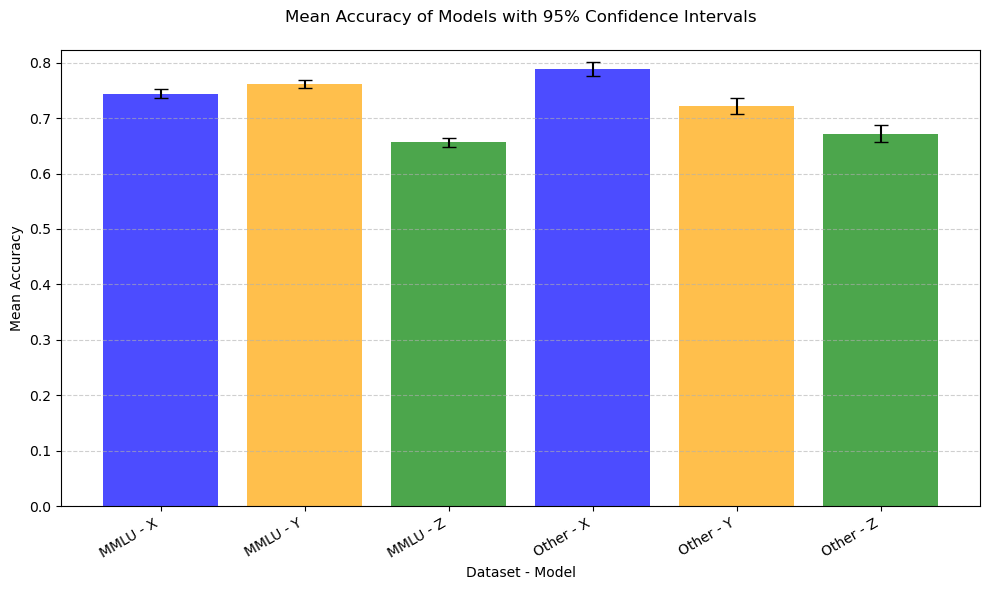

In [23]:
import matplotlib.pyplot as plt

# Reset index for plotting
accuracy_stats_reset = accuracy_stats.reset_index()

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(
    accuracy_stats_reset["Dataset"] + " - " + accuracy_stats_reset["Model"],
    accuracy_stats_reset["mean_accuracy"],
    yerr=accuracy_stats_reset["std_error"] * 1.96,  # 95% Confidence Interval
    capsize=5,  # Error bar cap size
    color=["blue", "orange", "green", "blue", "orange", "green"],  # Different colors for models
    alpha=0.7  # Transparency
)

# Annotate the plot
plt.ylabel("Mean Accuracy")
plt.xlabel("Dataset - Model")
plt.title("Mean Accuracy of Models with 95% Confidence Intervals", pad=20)  # Add padding to the title
plt.xticks(rotation=30, ha="right")  # Rotate x-axis labels for readability

# Set the y-axis to start at 0
max_y = accuracy_stats_reset["mean_accuracy"].max() + (accuracy_stats_reset["std_error"].max() * 1.96)
plt.ylim(0, max_y + 0.02)  # Start at 0 with some margin above the highest bar

# Add gridlines
plt.grid(axis="y", linestyle="--", alpha=0.6)  # Add horizontal grid lines

# Optimize layout
plt.tight_layout()

# Show the plot
plt.show()


Mean Accuracy and 95% Confidence Intervals:
  Dataset Model  mean_accuracy  ci_lower  ci_upper
0    MMLU     X       0.743588  0.735674  0.751501
1    MMLU     Y       0.761542  0.753819  0.769266
2    MMLU     Z       0.655951  0.647341  0.664561
3   Other     X       0.787976  0.774907  0.801044
4   Other     Y       0.720936  0.706595  0.735277
5   Other     Z       0.671721  0.656707  0.686735


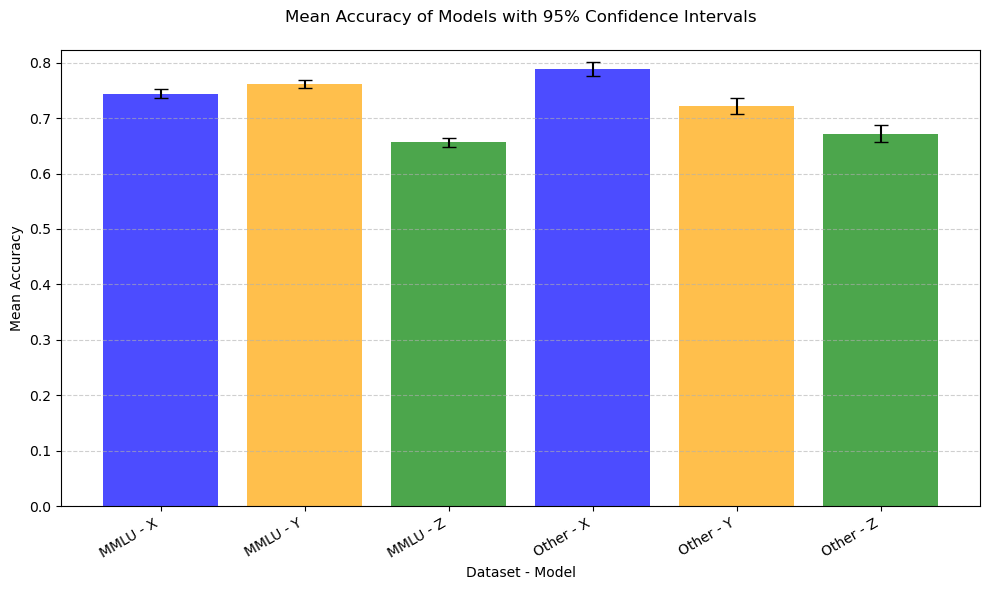

In [24]:
import matplotlib.pyplot as plt

# Calculate the 95% Confidence Intervals for each model
accuracy_stats_reset["ci_lower"] = accuracy_stats_reset["mean_accuracy"] - (accuracy_stats_reset["std_error"] * 1.96)
accuracy_stats_reset["ci_upper"] = accuracy_stats_reset["mean_accuracy"] + (accuracy_stats_reset["std_error"] * 1.96)

# Print the Confidence Intervals alongside the mean accuracy
print("Mean Accuracy and 95% Confidence Intervals:")
print(accuracy_stats_reset[["Dataset", "Model", "mean_accuracy", "ci_lower", "ci_upper"]])

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(
    accuracy_stats_reset["Dataset"] + " - " + accuracy_stats_reset["Model"],
    accuracy_stats_reset["mean_accuracy"],
    yerr=accuracy_stats_reset["std_error"] * 1.96,  # 95% Confidence Interval
    capsize=5,  # Error bar cap size
    color=["blue", "orange", "green", "blue", "orange", "green"],  # Different colors for models
    alpha=0.7  # Transparency
)

# Annotate the plot
plt.ylabel("Mean Accuracy")
plt.xlabel("Dataset - Model")
plt.title("Mean Accuracy of Models with 95% Confidence Intervals", pad=20)  # Add padding to the title
plt.xticks(rotation=30, ha="right")  # Rotate x-axis labels for readability

# Adjust the y-axis limit to ensure full visibility of error bars
max_y = accuracy_stats_reset["mean_accuracy"].max() + (accuracy_stats_reset["std_error"].max() * 1.96)
plt.ylim(0, max_y + 0.02)  # Add an extra margin of 0.02 above the highest bar

# Add gridlines
plt.grid(axis="y", linestyle="--", alpha=0.6)  # Add horizontal grid lines

# Optimize layout
plt.tight_layout()

# Show the plot
plt.show()


C. /Discuss:/ Though it is hard to say which model performs the best overal, I would say that Model X is a good candidate for that. The reason for it is that not only it performed best in the "Other" Test (with a signficant difference from both model Y and Z, which can be seen from the fact that the confidence intervals do not overlap), but it performed almost as good as model Y in the "MMLU" Test (though the second version of the plot make it seem like there is a huge difference, this is just a visual effect, since if we look at the plot when y starts at 0, we see that this is not the case). The reason why I plotted this second version was just to see the size of the Confidence Interval Bar.

Moreover, as calculated in Part A, we see that Model X has a more consistent performance, which is indicated by the fact that for both Tests, it has the smallest Standard Error across all the other models.

One interesting thing to point out is that for the "Other" Test, all the models had a greater Standard Error (close to double from the MMLU Test), which can also be visually seem by the size of the confidence interval bar in the second version of the plot.

Moreover, Model Z was the worst one across both Tests, which seem to indicate that it might be the worst of all the 3 models.

### 2.2 (5 pt)

Geronimo has assured you that both datasets contain questions of similar difficulty, so, what could be going on here?

A. What is the distribution of correct answers (A, B, C, D) for each dataset? Create a bar chart to visualize this.

B. Perform a chi-square test at $\alpha = 0.05$, of independence to determine if there's a significant difference in the distribution of correct answers between the two datasets. What do you conclude?

**hints**:
- for (A), keep in mind that df_mmlu and df_other contain the results of all models, i.e., the `question_id` column is duplicated.
- for (A), take care to clearly annotate the bar chart, e.g., title, y-label, legend.
- for (B), clearly state the null hypothesis and alternative hypothesis
- use the `chi2_contingency` function from `scipy.stats`
- format your results from answer (A) as a 2D array

Overall value counts for MMLU dataset (questions):
A    35073
B    35088
C    35088
D    35079
dtype: int64

Overall value counts for Other dataset (questions):
A    11277
B    11277
C    11277
D    11277
dtype: int64


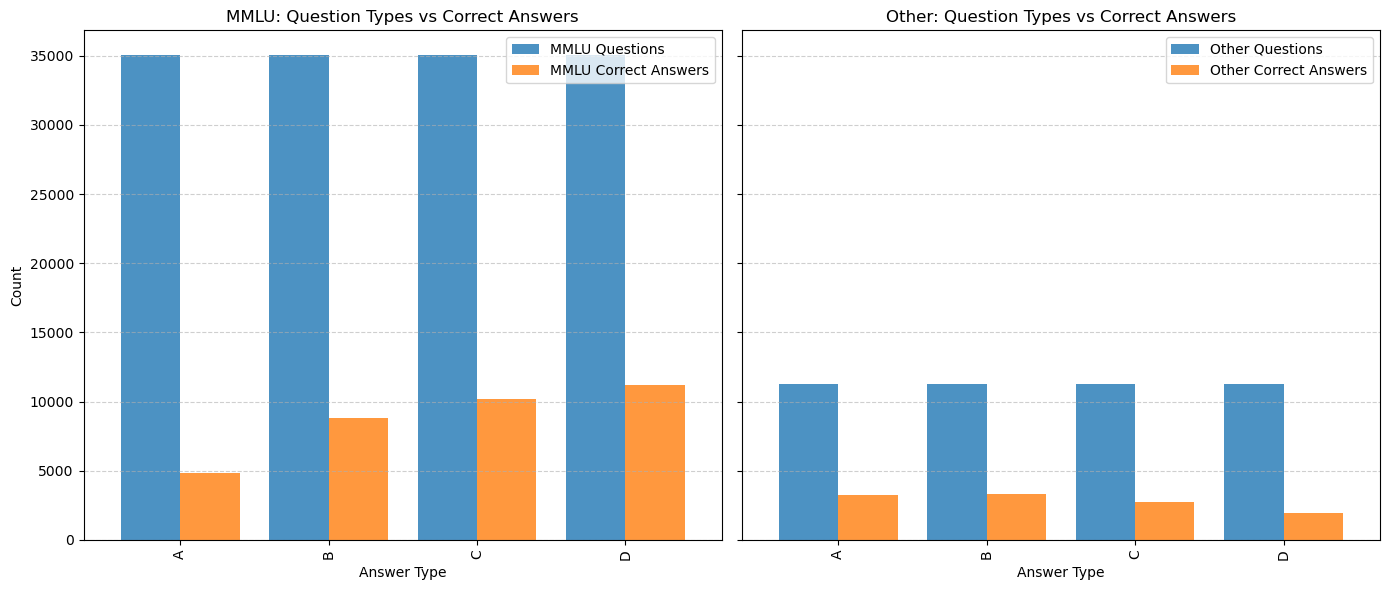


Combined Distribution:
   MMLU Questions  MMLU Correct Answers  Other Questions  \
A           35073                  4833            11277   
B           35088                  8829            11277   
C           35088                 10209            11277   
D           35079                 11217            11277   

   Other Correct Answers  
A                   3234  
B                   3348  
C                   2772  
D                   1923  


In [25]:

# Count the number of each question type (A, B, C, D) for both datasets
mmlu_question_dist = df_mmlu[['A', 'B', 'C', 'D']].notna().sum()
other_question_dist = df_other[['A', 'B', 'C', 'D']].notna().sum()

# Count the correct answers (A, B, C, D) for both datasets
mmlu_correct_dist = df_mmlu['answer'].value_counts()
other_correct_dist = df_other['answer'].value_counts()

# Print overall value counts for the questions in each dataset
print("Overall value counts for MMLU dataset (questions):")
print(mmlu_question_dist)
print("\nOverall value counts for Other dataset (questions):")
print(other_question_dist)

# Combine counts into a single DataFrame, dynamically handling missing options
combined_dist = pd.DataFrame({
    "MMLU Questions": mmlu_question_dist,
    "MMLU Correct Answers": mmlu_correct_dist,
    "Other Questions": other_question_dist,
    "Other Correct Answers": other_correct_dist
}).fillna(0)  # Fill missing values with 0 for non-existent options

# Plot the distributions
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot for MMLU dataset
combined_dist[["MMLU Questions", "MMLU Correct Answers"]].plot(
    kind="bar", ax=axes[0], alpha=0.8, width=0.8
)
axes[0].set_title("MMLU: Question Types vs Correct Answers")
axes[0].set_ylabel("Count")
axes[0].set_xlabel("Answer Type")
axes[0].grid(axis="y", linestyle="--", alpha=0.6)

# Plot for Other dataset
combined_dist[["Other Questions", "Other Correct Answers"]].plot(
    kind="bar", ax=axes[1], alpha=0.8, width=0.8
)
axes[1].set_title("Other: Question Types vs Correct Answers")
axes[1].set_xlabel("Answer Type")
axes[1].grid(axis="y", linestyle="--", alpha=0.6)

# Optimize layout
plt.tight_layout()

# Show the plots
plt.show()

# Print the combined distribution for reference
print("\nCombined Distribution:")
print(combined_dist)


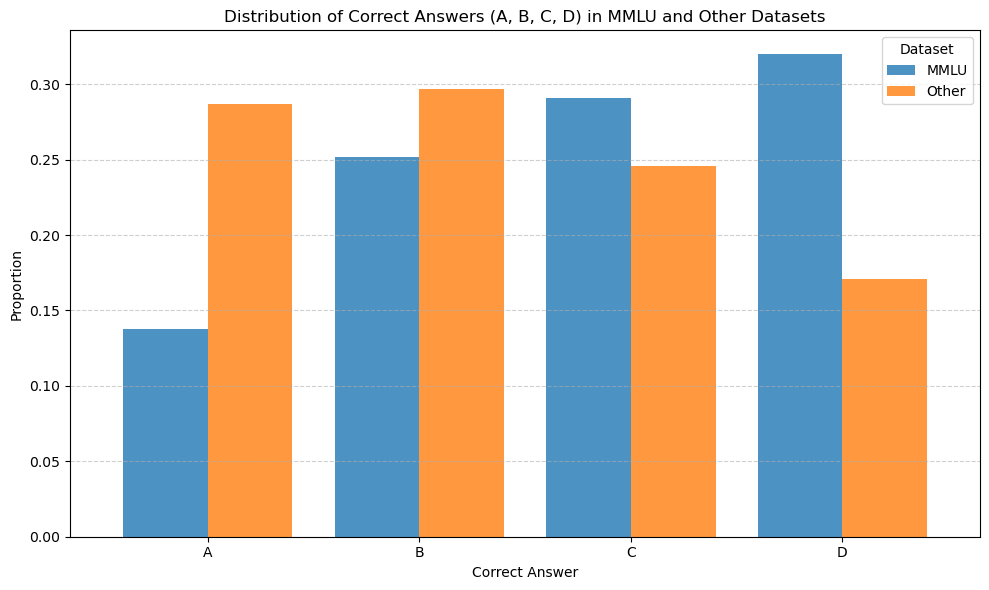

Distribution of Correct Answers:
            MMLU     Other
answer                    
A       0.137739  0.286778
B       0.251624  0.296887
C       0.290954  0.245810
D       0.319682  0.170524
Proportion of Correct Answers in MMLU:
answer
D    0.319682
C    0.290954
B    0.251624
A    0.137739
Name: proportion, dtype: float64

Proportion of Correct Answers in Other:
answer
B    0.296887
A    0.286778
C    0.245810
D    0.170524
Name: proportion, dtype: float64


In [26]:
#A
# Calculate the distribution of correct answers (A, B, C, D) for each dataset
mmlu_correct_dist = df_mmlu['answer'].value_counts(normalize=True)
other_correct_dist = df_other['answer'].value_counts(normalize=True)

# Combine distributions into a DataFrame for easy plotting
correct_dist = pd.DataFrame({
    "MMLU": mmlu_correct_dist,
    "Other": other_correct_dist
}).fillna(0)  # Fill missing values with 0 for answers that don't appear

# Plot the distributions as a bar chart
correct_dist.plot(kind="bar", figsize=(10, 6), alpha=0.8, width=0.8)
plt.title("Distribution of Correct Answers (A, B, C, D) in MMLU and Other Datasets")
plt.ylabel("Proportion")
plt.xlabel("Correct Answer")
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.legend(title="Dataset")
plt.grid(axis="y", linestyle="--", alpha=0.6)

# Show the plot
plt.tight_layout()
plt.show()

# Print the distribution table for reference
print("Distribution of Correct Answers:")
print(correct_dist)

# Inspect raw proportions
print("Proportion of Correct Answers in MMLU:")
print(mmlu_correct_dist)

print("\nProportion of Correct Answers in Other:")
print(other_correct_dist)



In [27]:
#B
from scipy.stats import chi2_contingency

# Combine distributions into a 2D array for chi-square test
# Ensure the order is consistent (A, B, C, D)
mmlu_correct_dist = df_mmlu['answer'].value_counts()
other_correct_dist = df_other['answer'].value_counts()

# Create a contingency table
categories = ['A', 'B', 'C', 'D']
contingency_table = pd.DataFrame({
    "MMLU": [mmlu_correct_dist.get(cat, 0) for cat in categories],
    "Other": [other_correct_dist.get(cat, 0) for cat in categories]
}, index=categories)

# Perform chi-square test of independence
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Our Null Hypothesis is what the Distribution of Correct Answers (A, B, C, D) are the same between the 2 Datasets
# Our Alternative Hypothesis is that the distribution of correct answers are different between the 2 Datasets
# What this test essentially does it that it compares the observed frequencies (from the contingency table) to the expected frequencies (what we’d expect if the distributions were the same).

# Based on the chi-square statistic and the degrees of freedom (number of rows - 1 number of columns - 1), the p-value tells us how likely it is to observe such a difference by chance. The P-Value is probability of observing a difference as extreme as (or more extreme than) the one seen in your data, purely by chance, assuming the null hypothesis is true (that the distribution of correct answers are the same between the 2 datasets)

# Print results
print("Contingency Table:")
print(contingency_table)
print("\nExpected Frequencies:")
print(pd.DataFrame(expected, index=categories, columns=contingency_table.columns))

print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"Degrees of Freedom: {dof}")
print(f"P-Value: {p_value}")

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("\nConclusion: Reject the null hypothesis. There is a significant difference in the distribution of correct answers between the two datasets.")
else:
    print("\nConclusion: Fail to reject the null hypothesis. There is no significant difference in the distribution of correct answers between the two datasets.")

Contingency Table:
    MMLU  Other
A   4833   3234
B   8829   3348
C  10209   2772
D  11217   1923

Expected Frequencies:
          MMLU        Other
A  6104.926043  1962.073957
B  9215.282562  2961.717438
C  9823.731867  3157.268133
D  9944.059528  3195.940472

Chi-Square Test Results:
Chi-Square Statistic: 1888.187602693425
Degrees of Freedom: 3
P-Value: 0.0

Conclusion: Reject the null hypothesis. There is a significant difference in the distribution of correct answers between the two datasets.


Discuss:/ The Result of this Chi-Square Test confirms our intution that indeed, there is a sginficant difference between the distribution of correct answers between the 2 datasets. This can be seen from the fact that the P-Value is less than 0.05, which means that we can reject the Null Hypothesis that the distribution of correct answers are the same between the 2 datasets. This is also visually confirmed by the Bar Chart that we plotted in Part A, where we see that the distribution of correct answers is quite different between the 2 datasets.

Though we got a result for the p-value as being exactly 0, this doesn't mean it's trully zero, but just that it is so small that the computer precision treats as 0 essentialy.

Something interesting to notice is that for the MMLU Dataset, the fraction of correct answers for D is around 32% while the fraction of corrected D answers for the Other Dataset is around only 17%, which is quite a big difference (if the asumption was that they were supposed to be the same). For answers A, we observe something similar, but now, it is the Other Dataset that has a higher fraction of correct answers for A than the MMLU Dataset (13% vs 28%).


### 2.3 (7 pt)

Let's dive in deeper:

A. What is language model X's mean accuracy conditioned on the four answer options for each dataset?

B. Compare LM X's performance when the correct answer is "A" between the two datasets. Use a T-test with CI = 0.95. What do you conclude?

C. Compare LM X's performance when the correct answer is "A" vs. "C or D" for each dataset. Use a T-test with CI = 0.95. What do you conclude?

In [28]:
#A
# Filter data for model X in both datasets
lm_x_mmlu = df_mmlu[df_mmlu['model_name'] == 'X']
lm_x_other = df_other[df_other['model_name'] == 'X']

# Group by correct answer and compute mean accuracy for model X
mean_accuracy_mmlu = lm_x_mmlu.groupby('answer')['correct'].mean()
mean_accuracy_other = lm_x_other.groupby('answer')['correct'].mean()

# Combine results into a DataFrame for comparison
mean_accuracy_comparison = pd.DataFrame({
    'MMLU': mean_accuracy_mmlu,
    'Other': mean_accuracy_other
}).fillna(0)  # Fill missing values with 0 in case an answer doesn't exist

# Print the results
print("Mean Accuracy of Language Model X Conditioned on Answer Options:")
print(mean_accuracy_comparison)


Mean Accuracy of Language Model X Conditioned on Answer Options:
            MMLU     Other
answer                    
A       0.972688  0.974026
B       0.799185  0.806452
C       0.707905  0.676407
D       0.633592  0.603744


In [29]:
#B
# Though I do not expect any difference, since the Values are essnetially the same, let's perform the test anyways
from scipy.stats import ttest_ind

# Filter data for Model X where the correct answer is "A"
lm_x_mmlu_a = lm_x_mmlu[lm_x_mmlu['answer'] == 'A']
lm_x_other_a = lm_x_other[lm_x_other['answer'] == 'A']

# Perform a two-sample t-test
t_stat, p_value = ttest_ind(lm_x_mmlu_a['correct'], lm_x_other_a['correct'], equal_var=False)

# Print results
print("T-Test Results for LM X's Performance on Correct Answer 'A' Between MMLU and Other:")
print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

# Conclusion based on alpha = 0.05
alpha = 0.05
if p_value < alpha:
    print("\nConclusion: Reject the null hypothesis. There is a significant difference in LM X's performance when the correct answer is 'A' between the two datasets.")
else:
    print("\nConclusion: Fail to reject the null hypothesis. There is no significant difference in LM X's performance when the correct answer is 'A' between the two datasets.")


T-Test Results for LM X's Performance on Correct Answer 'A' Between MMLU and Other:
T-Statistic: -0.21161116511164932
P-Value: 0.8324287723934077

Conclusion: Fail to reject the null hypothesis. There is no significant difference in LM X's performance when the correct answer is 'A' between the two datasets.


We conclude that there is not significant difference in LM X performance for the correct answer A between the 2 Datasets. Though this was expected by just looking at the mean being almost the same, the T-Test also takes into account the variance of the data and the sample size, confirming our original intuition.

In [30]:
#C
# Assuming that the Question meant to Compare A with the grouping of C and D
from scipy.stats import ttest_ind

# Combine "C or D" into one group for both datasets
lm_x_mmlu_cd = lm_x_mmlu[lm_x_mmlu['answer'].isin(['C', 'D'])]
lm_x_other_cd = lm_x_other[lm_x_other['answer'].isin(['C', 'D'])]

# Perform t-tests for MMLU dataset
t_stat_mmlu, p_value_mmlu = ttest_ind(
    lm_x_mmlu[lm_x_mmlu['answer'] == 'A']['correct'],
    lm_x_mmlu_cd['correct'],
    equal_var=False
)

# Perform t-tests for Other dataset
t_stat_other, p_value_other = ttest_ind(
    lm_x_other[lm_x_other['answer'] == 'A']['correct'],
    lm_x_other_cd['correct'],
    equal_var=False
)

# Print results for MMLU
print("T-Test Results for LM X's Performance on Correct Answer 'A' vs. 'C or D' in MMLU:")
print(f"T-Statistic (MMLU): {t_stat_mmlu}")
print(f"P-Value (MMLU): {p_value_mmlu}")

# Conclusion for MMLU
alpha = 0.05
if p_value_mmlu < alpha:
    print("Conclusion: Reject the null hypothesis for MMLU. There is a significant difference in LM X's performance between 'A' and 'C or D' in the MMLU dataset.")
else:
    print("Conclusion: Fail to reject the null hypothesis for MMLU. There is no significant difference in LM X's performance between 'A' and 'C or D' in the MMLU dataset.")

# Print results for Other dataset
print("\nT-Test Results for LM X's Performance on Correct Answer 'A' vs. 'C or D' in Other Dataset:")
print(f"T-Statistic (Other): {t_stat_other}")
print(f"P-Value (Other): {p_value_other}")

# Conclusion for Other
if p_value_other < alpha:
    print("Conclusion: Reject the null hypothesis for Other. There is a significant difference in LM X's performance between 'A' and 'C or D' in the Other dataset.")
else:
    print("Conclusion: Fail to reject the null hypothesis for Other. There is no significant difference in LM X's performance between 'A' and 'C or D' in the Other dataset.")


T-Test Results for LM X's Performance on Correct Answer 'A' vs. 'C or D' in MMLU:
T-Statistic (MMLU): 44.05883659993774
P-Value (MMLU): 0.0
Conclusion: Reject the null hypothesis for MMLU. There is a significant difference in LM X's performance between 'A' and 'C or D' in the MMLU dataset.

T-Test Results for LM X's Performance on Correct Answer 'A' vs. 'C or D' in Other Dataset:
T-Statistic (Other): 25.13948464328854
P-Value (Other): 1.1880049447651482e-121
Conclusion: Reject the null hypothesis for Other. There is a significant difference in LM X's performance between 'A' and 'C or D' in the Other dataset.


In [31]:
# C
# Assuming that the question meant comparing A vs C and then A vs D separately
from scipy.stats import ttest_ind

# Perform t-test for "A vs. C" in the MMLU dataset
t_stat_mmlu_ac, p_value_mmlu_ac = ttest_ind(
    lm_x_mmlu[lm_x_mmlu['answer'] == 'A']['correct'],
    lm_x_mmlu[lm_x_mmlu['answer'] == 'C']['correct'],
    equal_var=False
)

# Perform t-test for "A vs. D" in the MMLU dataset
t_stat_mmlu_ad, p_value_mmlu_ad = ttest_ind(
    lm_x_mmlu[lm_x_mmlu['answer'] == 'A']['correct'],
    lm_x_mmlu[lm_x_mmlu['answer'] == 'D']['correct'],
    equal_var=False
)

# Perform t-test for "A vs. C" in the Other dataset
t_stat_other_ac, p_value_other_ac = ttest_ind(
    lm_x_other[lm_x_other['answer'] == 'A']['correct'],
    lm_x_other[lm_x_other['answer'] == 'C']['correct'],
    equal_var=False
)

# Perform t-test for "A vs. D" in the Other dataset
t_stat_other_ad, p_value_other_ad = ttest_ind(
    lm_x_other[lm_x_other['answer'] == 'A']['correct'],
    lm_x_other[lm_x_other['answer'] == 'D']['correct'],
    equal_var=False
)

# Print results for MMLU
print("T-Test Results for MMLU Dataset:")
print(f"A vs. C - T-Statistic: {t_stat_mmlu_ac}, P-Value: {p_value_mmlu_ac}")
print(f"A vs. D - T-Statistic: {t_stat_mmlu_ad}, P-Value: {p_value_mmlu_ad}")

# Conclusion for MMLU
if p_value_mmlu_ac < alpha:
    print("Conclusion: Significant difference in LM X's performance between 'A' and 'C' in the MMLU dataset.")
else:
    print("Conclusion: No significant difference in LM X's performance between 'A' and 'C' in the MMLU dataset.")

if p_value_mmlu_ad < alpha:
    print("Conclusion: Significant difference in LM X's performance between 'A' and 'D' in the MMLU dataset.")
else:
    print("Conclusion: No significant difference in LM X's performance between 'A' and 'D' in the MMLU dataset.")

# Print results for Other dataset
print("\nT-Test Results for Other Dataset:")
print(f"A vs. C - T-Statistic: {t_stat_other_ac}, P-Value: {p_value_other_ac}")
print(f"A vs. D - T-Statistic: {t_stat_other_ad}, P-Value: {p_value_other_ad}")

# Conclusion for Other
if p_value_other_ac < alpha:
    print("Conclusion: Significant difference in LM X's performance between 'A' and 'C' in the Other dataset.")
else:
    print("Conclusion: No significant difference in LM X's performance between 'A' and 'C' in the Other dataset.")

if p_value_other_ad < alpha:
    print("Conclusion: Significant difference in LM X's performance between 'A' and 'D' in the Other dataset.")
else:
    print("Conclusion: No significant difference in LM X's performance between 'A' and 'D' in the Other dataset.")


T-Test Results for MMLU Dataset:
A vs. C - T-Statistic: 30.11983653835241, P-Value: 1.4153877765800134e-182
A vs. D - T-Statistic: 38.24650766147264, P-Value: 6.56324711254985e-282
Conclusion: Significant difference in LM X's performance between 'A' and 'C' in the MMLU dataset.
Conclusion: Significant difference in LM X's performance between 'A' and 'D' in the MMLU dataset.

T-Test Results for Other Dataset:
A vs. C - T-Statistic: 18.435192684428166, P-Value: 2.2040853668364496e-66
A vs. D - T-Statistic: 18.576925980773893, P-Value: 2.996971967725071e-63
Conclusion: Significant difference in LM X's performance between 'A' and 'C' in the Other dataset.
Conclusion: Significant difference in LM X's performance between 'A' and 'D' in the Other dataset.


Regardless if the Question meant to compare A vs (C and D) or A vs C and then A vs D, the results are actually similar.

For the case of A vs (C and D), we can see how the T-Test confirms that indeed there is a significant difference in the performance of LM X when the correct answer is A vs C and D in both datasets. This is confirmed by the P-Value being less than 0.05 (in fact, much smaller than that). Interestingly enough, the propertion of correct answers for A in the MMLU Dataset was the smallest of all answers, and still , despite this Imbalance, the T-Test still confirmed that there is a significant difference in the performance of LM X when the correct answer is A vs C and D.

For the case of A vs C and A vs D, the same conclsusion. We see that for both cases and in both datasets, there was a significant difference in the performance of LM X when the correct answer is A vs C and A vs D.

Out of curiosity, I will also test A vs B for both datasets here bellow:


In [32]:
# C - Extra Part
# Perform t-test for "A vs. B" in the MMLU dataset
t_stat_mmlu_ab, p_value_mmlu_ab = ttest_ind(
    lm_x_mmlu[lm_x_mmlu['answer'] == 'A']['correct'],
    lm_x_mmlu[lm_x_mmlu['answer'] == 'B']['correct'],
    equal_var=False
)

# Perform t-test for "A vs. B" in the Other dataset
t_stat_other_ab, p_value_other_ab = ttest_ind(
    lm_x_other[lm_x_other['answer'] == 'A']['correct'],
    lm_x_other[lm_x_other['answer'] == 'B']['correct'],
    equal_var=False
)

# Print results for MMLU
print("T-Test Results for MMLU Dataset (A vs. B):")
print(f"T-Statistic: {t_stat_mmlu_ab}, P-Value: {p_value_mmlu_ab}")

# Conclusion for MMLU
alpha = 0.05
if p_value_mmlu_ab < alpha:
    print("Conclusion: Significant difference in LM X's performance between 'A' and 'B' in the MMLU dataset.")
else:
    print("Conclusion: No significant difference in LM X's performance between 'A' and 'B' in the MMLU dataset.")

# Print results for Other dataset
print("\nT-Test Results for Other Dataset (A vs. B):")
print(f"T-Statistic: {t_stat_other_ab}, P-Value: {p_value_other_ab}")

# Conclusion for Other
if p_value_other_ab < alpha:
    print("Conclusion: Significant difference in LM X's performance between 'A' and 'B' in the Other dataset.")
else:
    print("Conclusion: No significant difference in LM X's performance between 'A' and 'B' in the Other dataset.")


T-Test Results for MMLU Dataset (A vs. B):
T-Statistic: 20.583563863587763, P-Value: 7.6526420003816105e-90
Conclusion: Significant difference in LM X's performance between 'A' and 'B' in the MMLU dataset.

T-Test Results for Other Dataset (A vs. B):
T-Statistic: 13.106181496588759, P-Value: 3.3075638312108133e-37
Conclusion: Significant difference in LM X's performance between 'A' and 'B' in the Other dataset.


Also here we see how overall, X is better at answering A (now we can afirm this with more confidence, since we compared A with all other possibilities and found a significant difference in all cases).

### 2.4 (2 pt)

What an intriguing finding! 

A. Print the mean accuracies conditioned on the correct answer for all LMs for each dataset.

B. /Discuss:/ What do you observe?

In [33]:
#A
# Group by model_name and correct answer, then compute mean accuracy for MMLU
mean_accuracy_mmlu_all = df_mmlu.groupby(['model_name', 'answer'])['correct'].mean().unstack()

# Group by model_name and correct answer, then compute mean accuracy for Other dataset
mean_accuracy_other_all = df_other.groupby(['model_name', 'answer'])['correct'].mean().unstack()

# Combine results into a single DataFrame for comparison
mean_accuracy_all_comparison = pd.concat(
    [mean_accuracy_mmlu_all, mean_accuracy_other_all],
    keys=['MMLU', 'Other'],
    names=['Dataset', 'Model']
)

# Print results
print("Mean Accuracies Conditioned on Correct Answer for All LMs:")
print(mean_accuracy_all_comparison)


Mean Accuracies Conditioned on Correct Answer for All LMs:
answer                A         B         C         D
Dataset Model                                        
MMLU    X      0.972688  0.799185  0.707905  0.633592
        Y      0.623836  0.688073  0.733470  0.904252
        Z      0.643079  0.641182  0.669115  0.661139
Other   X      0.974026  0.806452  0.676407  0.603744
        Y      0.625232  0.663978  0.762987  0.920437
        Z      0.680891  0.667563  0.662338  0.677067


B. /Discuss:/
* Model X: As discussed in the previous question, Model X performs much better when the correct answer is A in both datasets. Besides, it also performs alright with B and has a similar performance for C and D. What is most surprising is in the discrepancy of the accuracy (can go from 97% when the correct answer is A all the way down to 63% when the answer is D)

* Model Y: Model Y has a similar behaviour to Model X when it comes to being much better at a specific type of questions (namely in getting the correct answer when it's D).

* Model Z: This might be the most surprising fact to me, because this is the only model that performs increadibly similar accross all the different possible correct answers and this holds for both datasets. However, it is worth noting that though this performance is more stable, it is pretty low compared to the other models (it basically performs as bad as the worst performance of Model X and Y).

Overall, we can see how Models X and Y have extremely good performance for a specific type of question while Model Z performs equally (though poorly) for all types of questions.



### 2.5 (2 pt)

Concerned with your findings so far, you quickly consult with Geronimo. After thinking it over, Geronimo concludes that more tests are needed. He orders a second round of MMLU results. However, Geronimo thinks of the following twist: while keeping questions fixed, he randomly permutes the position of the correct answer. The new results can be found in the folder `data/task_2_5/`:
```
task_2_5/
│
└── lm_scores_mmlu_shuffle.csv
```

/Discuss:/ Why would Geronimo do this?

B. /Discuss:/ This is actually a very clever idea from Geronimo. The reason for this is that it helps to check if the model is biased towards a specific position of answers (for example, perhpas Model X was picking A so much because it was the first position and not because it was confident that this was the right answer), which could be the same case for Model Y (that was extremely accuracte for D).

If the models suddently start behaving very diferently just because the order of the correct answer changed (though the content is still exactly the same, that might reveal some problematic things about the realibilty of such models)

I am curious to see the actual performance with the shuffled one)



In [34]:
# Load the shuffled dataset
df_mmlu_shuffle = pd.read_csv('data/task_2_5/lm_scores_mmlu_shuffle.csv')

# Compute overall accuracy for each model in the original dataset
overall_accuracy_original = df_mmlu.groupby('model_name')['correct'].mean()

# Compute overall accuracy for each model in the shuffled dataset
overall_accuracy_shuffle = df_mmlu_shuffle.groupby('model_name')['correct'].mean()

# Print overall accuracy results
print("Overall Accuracy for Original Dataset:")
print(overall_accuracy_original)
print("\nOverall Accuracy for Shuffled Dataset:")
print(overall_accuracy_shuffle)

# Compute accuracy conditioned by answer for each model in the original dataset
conditioned_accuracy_original = df_mmlu.groupby(['model_name', 'answer'])['correct'].mean().unstack()

# Compute accuracy conditioned by answer for each model in the shuffled dataset
conditioned_accuracy_shuffle = df_mmlu_shuffle.groupby(['model_name', 'answer'])['correct'].mean().unstack()

# Print conditioned accuracy results
print("\nConditioned Accuracy for Original Dataset:")
print(conditioned_accuracy_original)
print("\nConditioned Accuracy for Shuffled Dataset:")
print(conditioned_accuracy_shuffle)


Overall Accuracy for Original Dataset:
model_name
X    0.743588
Y    0.761542
Z    0.655951
Name: correct, dtype: float64

Overall Accuracy for Shuffled Dataset:
model_name
X    0.783088
Y    0.740253
Z    0.666040
Name: correct, dtype: float64

Conditioned Accuracy for Original Dataset:
answer             A         B         C         D
model_name                                        
X           0.972688  0.799185  0.707905  0.633592
Y           0.623836  0.688073  0.733470  0.904252
Z           0.643079  0.641182  0.669115  0.661139

Conditioned Accuracy for Shuffled Dataset:
answer             A         B         C         D
model_name                                        
X           0.968496  0.804838  0.704530  0.644172
Y           0.643293  0.677346  0.741249  0.911945
Z           0.665989  0.667865  0.668840  0.661133


This is surprising, since there was no big difference between the metrics, but I am unsure of what this means just with the numbers. Though, we can see that model X performed better in the Shuffled one, but retained a very similar distribution accross the different types of answers.

### 2.6 (4 pt)

Increasingly sceptical of the language models' performance, you read up on proper testing practices. You stumble upon the concept of [test-rested stability](https://en.wikipedia.org/wiki/Repeatability), which roughtly states that:

"_Measurements taken by a single person or instrument on the same item, under the same conditions, and in a short period of time, should have the same results._"

In our case, we would assume an LM would have the same performance on a given question regardless of the correct answer position. One way of testing this is by using the following metric:

$$\text{test-retest metric} = \frac{1}{N}\sum_{i=1}^N \frac{1}{M}\sum_{j=1}^M c^i_0 c_j^i,$$

where $c^i_0 \in \{0, 1\}$ indicates whether the model answers the $i^{\text{th}}$ question correctly (1 if correct, 0 if incorrect). $c_j^i$ indicates whether the model answers the $i^{\text{th}}$ question correctly in the $j^{\text{th}}$ shuffled version of the answer label content. Finally, $M$ is the total number of shuffles and $N$ is the dataset size.

Task: compute the test-retest metric for each language model using the original `lm_scores_mmlu.csv` file and the new `lm_scores_mmlu_shuffle.csv` file. Using a bar plot, visualize your results by comparing the accuracy of the original `lm_scores_mmlu.csv` and the test-retest scores.

**hints**
- what is $M$ in our case?

(bonus: no points, but so much sweet, sweet knowledge - check out [the following article](https://arxiv.org/pdf/2406.19470v1))

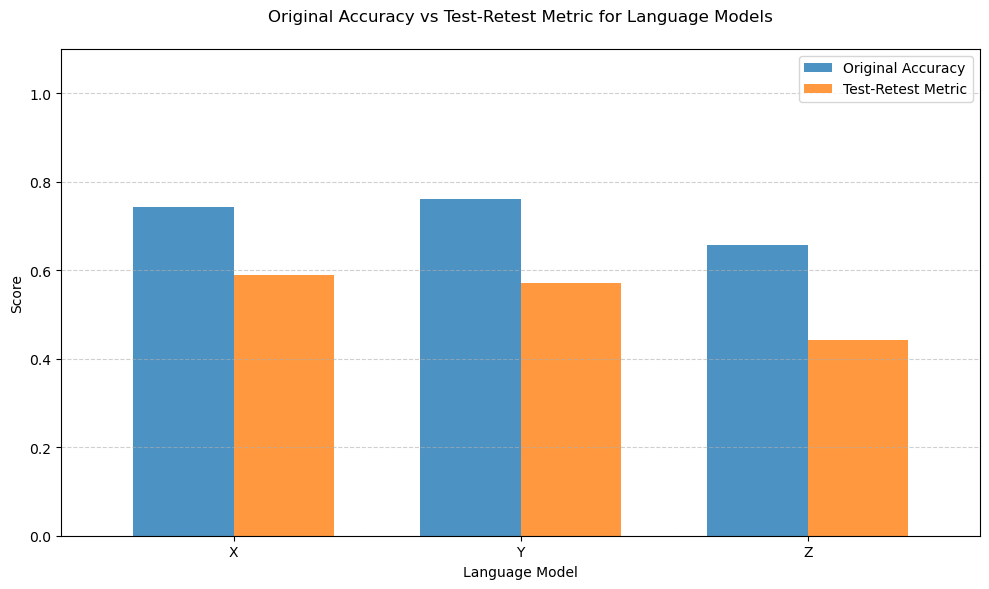

Original Accuracy and Test-Retest Metric for Each Model:
  Model  Original Accuracy  Test-Retest Metric
0     X           0.743588            0.588406
1     Y           0.761542            0.571648
2     Z           0.655951            0.441604


In [35]:
#fancy code
# Calculate the test-retest metric
def compute_test_retest(original_df, shuffled_df):
    # Merge the original and shuffled datasets on question_id and model_name
    merged = original_df.merge(
        shuffled_df,
        on=["question_id", "model_name"],
        suffixes=("_original", "_shuffled")
    )

    # Compute the test-retest metric for each model
    test_retest_scores = (
        merged.groupby("model_name")
        .apply(lambda group: np.mean(group["correct_original"] * group["correct_shuffled"]))
    )

    return test_retest_scores

# Load original and shuffled datasets
df_mmlu = pd.read_csv('data/task_2/lm_scores_mmlu.csv')
df_mmlu_shuffle = pd.read_csv('data/task_2_5/lm_scores_mmlu_shuffle.csv')

# Add boolean correct columns for merging (if not already)
df_mmlu["correct"] = df_mmlu["correct"].astype(int)
df_mmlu_shuffle["correct"] = df_mmlu_shuffle["correct"].astype(int)

# Compute the test-retest metric
test_retest_scores = compute_test_retest(df_mmlu, df_mmlu_shuffle)

# Compute overall accuracy for the original dataset
overall_accuracy_original = df_mmlu.groupby("model_name")["correct"].mean()

# Combine results into a single DataFrame for plotting
results = pd.DataFrame({
    "Model": overall_accuracy_original.index,
    "Original Accuracy": overall_accuracy_original.values,
    "Test-Retest Metric": test_retest_scores.values
})

# Plot the results
results.set_index("Model").plot(kind="bar", figsize=(10, 6), alpha=0.8, width=0.7)
plt.title("Original Accuracy vs Test-Retest Metric for Language Models", pad=20)
plt.ylabel("Score")
plt.xlabel("Language Model")
plt.xticks(rotation=0)
plt.ylim(0, 1.1)  # Ensure the y-axis covers the full range
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

# Print the scores
print("Original Accuracy and Test-Retest Metric for Each Model:")
print(results)


In our case, M = 1, since we essentially just have one shuffled version of the Dataset, namely "lm_scores_mmlu_shuffle.csv".

### 2.7 (2 pt)

A. Using the unshuffled data: For each LM, print the distribution of the answers they give as well as the accuracy conditioned on the answer they give.

B. /Discuss:/ Describe what you observe

[bonus: not scored, but again _that sweet, sweet knowledge_] Could you think of a plausible explanation?

In [36]:
#A
# Calculate the distribution of answers given by each model in the unshuffled data
answer_distribution = df_mmlu.groupby("model_name")["result"].value_counts(normalize=True).unstack().fillna(0)

# Calculate accuracy conditioned on the answer given by each model
conditioned_accuracy_given_answer = df_mmlu.groupby(["model_name", "result"])["correct"].mean().unstack()

# Print the results
print("Answer Distribution for Each Model (Proportion):")
print(answer_distribution)
print("\nAccuracy Conditioned on the Answer Given by Each Model:")
print(conditioned_accuracy_given_answer)


Answer Distribution for Each Model (Proportion):
result             A         B         C         D
model_name                                        
X           0.364142  0.227343  0.205968  0.202548
Y           0.091655  0.192886  0.257780  0.457678
Z           0.186047  0.246666  0.276761  0.290527

Accuracy Conditioned on the Answer Given by Each Model:
result             A         B         C         D
model_name                                        
X           0.367927  0.884543  1.000000  1.000000
Y           0.937500  0.897606  0.827861  0.631608
Z           0.476103  0.654073  0.703429  0.727487


B. /Discuss:/

In the first Table, se wee see the Distribution of answers given by each model (regardless if it was correct or not, but simply how often the model picks that answer. From this, it is clear that model X is biased towards picking A, while it distributes the rest of its answers quite evenly. Model Y, on the other hand, is the most biased model since it picks one of the options, namely D 45% of the time. Besides, the distribution of the other 3 answers is also not very even, since it picks A only 9% of the time. Model Z is the most balaneced one, since it distributes its answers more evenly (though A is underrepresented).

In the second table we see the accuracy of each model conditioned on the answer it gives. Here something interesting happens, namely the fact that the answer that te models answer more often, such is the case for Model X with A, is the one where it performs the worst. This also happens with Modely Y, which is biased towards answering D, but performs worst when it answers D. This makes sense, since the answer that these models are biased towards, doesn't reflect the distribution of correct answers, meaning that if they answer this specific answer more often, they will also get more wrong answers. Something interesting happens with Model Z, since the opposite trend happens, meaning that the answer it gives more frequently also corresponds to a higher accuracy. Though more investigation is necessary in order to state with certainity, but this seems to indicate that Model Z picks a specific answer because it's more confident than it's the correct answer.

## Task 3 (16 points): What do Questions and Answers look like for a Language Model?

While you feel pretty good about the tests you conducted so far, something still bothers you: what if the language models don't see the data like you do? Suddenly, you receive a phone call from a wise AI sage based in Maastricht named Yodata:

```
"Hmmm, correct you are, jonge padawan, to question how the wereld is seen by large language models! Simple 'text,' it is not, nee nee nee! Characters and words, the way of gewone humans, this is not, heh heh heh.

'Tokens,' they use, ja! Mysterious and powerful, these tokens are. Expand our vocabulary, they do, beyond the simple 'a to Z.' Chunky blocks of text, they become, yes! 'Hello world,' a simple phrase it may seem. But to a language model, '[24912, 2375]' it might appear, hmm? Verwarrend, it is!

Wise, it would be, to explore these MMLU data points through the eyes of a language model, you think? Yes, yes! Much to learn, there is. The ways of the tokens, understand you must, if truly comprehend the great LMs, you wish to.

Meditate on this, you should. The force of natural language processing, strong it is. But geduld, you must have, my jonge padawan. For only through great study and contemplation, will the mysteries of the tokens reveal themselves to you, they will. Ja, hmmm!"
```

Admittingly, Yodata at times speaks in riddles... However, he was explaining a crucial aspect of modern LMs called [Tokenization](https://learn.microsoft.com/en-us/dotnet/ai/conceptual/understanding-tokens):


“Tokens are words, character sets, or combinations of words and punctuation that are used by [language models (LMs)] to decompose text into. Tokenization is the first step in training”

Instead of characters, LMs process natural language using “tokens”. While this is useful for a number of reasons, it does at times introduce some “unintuitive” behavior…

In [37]:
# PROVIDED CODE

try:
    import tiktoken
except Exception as e:
    print('installing tiktoken package')
    
    #!pip install tiktoken
    
    import tiktoken

def tokenize_text(s):
    enc = tiktoken.encoding_for_model('gpt-4o')
    tokens = enc.encode(str(s))
    return tokens

example_string = 'hello world'
print(f'humans see: "{example_string}" --> language models see: {tokenize_text(example_string)}')

humans see: "hello world" --> language models see: [24912, 2375]


### 3.1 (5 pt)

Use the provided code in the cell above to "see the world through the eyes of a language model":

A. Tokenize the questions of the original MMLU data provided in task 1: `task_1/mmlu_data/test.csv` and plot the token distribution (the frequency of each token).

B. Same as (A), but now for the answers in columns (columns "A", "B", "C", and "D").

C. Isolate the tokens for the strings "A", "B", "C", and "D", then, for their occurances in both questions and answers, print their relative distribution to each other.

**hint**
- There are a _lot_ of tokens, consider using a cutoff point and log scale
- For (c), they should sum to 1

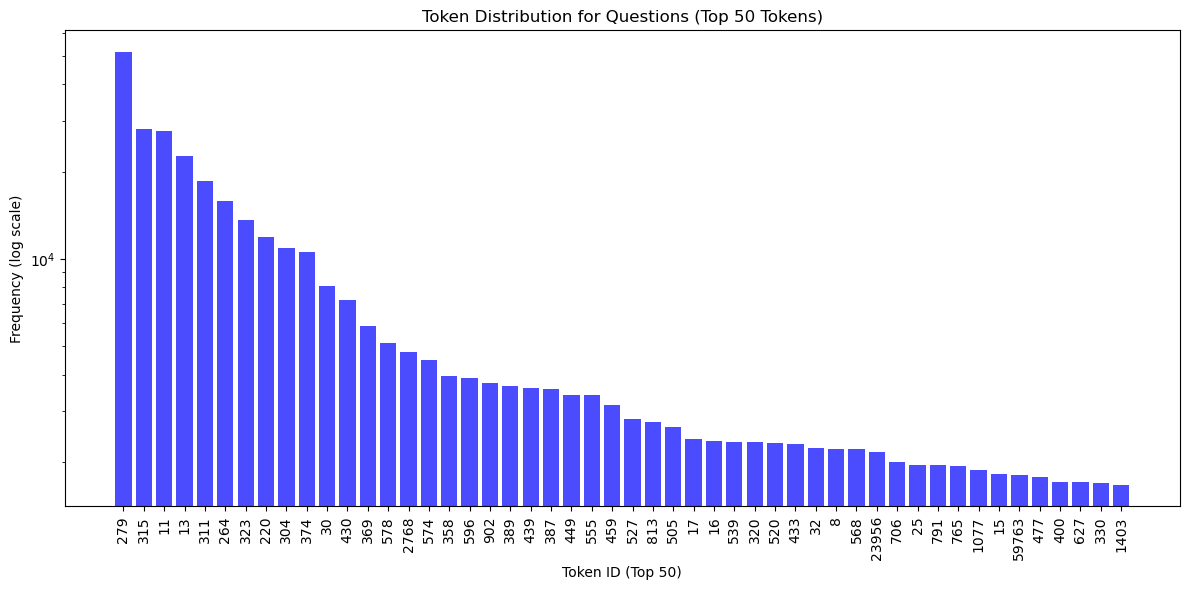

In [38]:
from collections import Counter
import matplotlib.pyplot as plt

# Load the MMLU test data
df_test = pd.read_csv('data/task_1/mmlu_data/test.csv')

# Define the tokenization function
def tokenize_text(s):
    try:
        import tiktoken
    except ImportError:
        print("Please install the `tiktoken` package.")
        return []

    enc = tiktoken.encoding_for_model('gpt-4')
    return enc.encode(str(s))

# Apply tokenization to the 'question' column
df_test['question_tokens'] = df_test['question'].apply(tokenize_text)

# Flatten the list of tokens from all questions
all_question_tokens = [token for tokens in df_test['question_tokens'] for token in tokens]

# Count the frequency of each token
token_counts = Counter(all_question_tokens)

# Sort tokens by frequency
sorted_tokens = sorted(token_counts.items(), key=lambda x: x[1], reverse=True)

# Extract the top 50 most common tokens for visualization
top_tokens = sorted_tokens[:50]
tokens, counts = zip(*top_tokens)

# Plot the token distribution (log scale)
plt.figure(figsize=(12, 6))
plt.bar(range(len(tokens)), counts, color='blue', alpha=0.7)  # Use indices for x-axis
plt.yscale('log')  # Apply log scale to y-axis
plt.xticks(range(len(tokens)), tokens, rotation=90)  # Label x-axis with token IDs
plt.xlabel('Token ID (Top 50)')
plt.ylabel('Frequency (log scale)')
plt.title('Token Distribution for Questions (Top 50 Tokens)')
plt.tight_layout()
plt.show()


In [39]:
# Decode the top tokens to see their corresponding strings
def decode_tokens(token_ids):
    try:
        import tiktoken
    except ImportError:
        print("Please install the `tiktoken` package.")
        return []

    enc = tiktoken.encoding_for_model('gpt-4')
    return [enc.decode([token_id]) for token_id in token_ids]

# Get the top tokens from the plot
top_token_ids = [token for token, count in top_tokens]

# Decode the tokens into strings
decoded_tokens = decode_tokens(top_token_ids)

# Create a DataFrame for better visualization
decoded_df = pd.DataFrame({"Token ID": top_token_ids, "String": decoded_tokens, "Frequency": counts})

# Display the result
print(decoded_df)


    Token ID      String  Frequency
0        279         the      51757
1        315          of      28016
2         11           ,      27561
3         13           .      22695
4        311          to      18567
5        264           a      15840
6        323         and      13633
7        220                  11894
8        304          in      10935
9        374          is      10573
10        30           ?       8078
11       430        that       7211
12       369         for       5899
13       578         The       5124
14      2768   following       4800
15       574         was       4498
16       358           I       3953
17       596          's       3883
18       902       which       3740
19       389          on       3653
20       439          as       3584
21       387          be       3561
22       449        with       3402
23       555          by       3402
24       459          an       3140
25       527         are       2822
26       813         his    

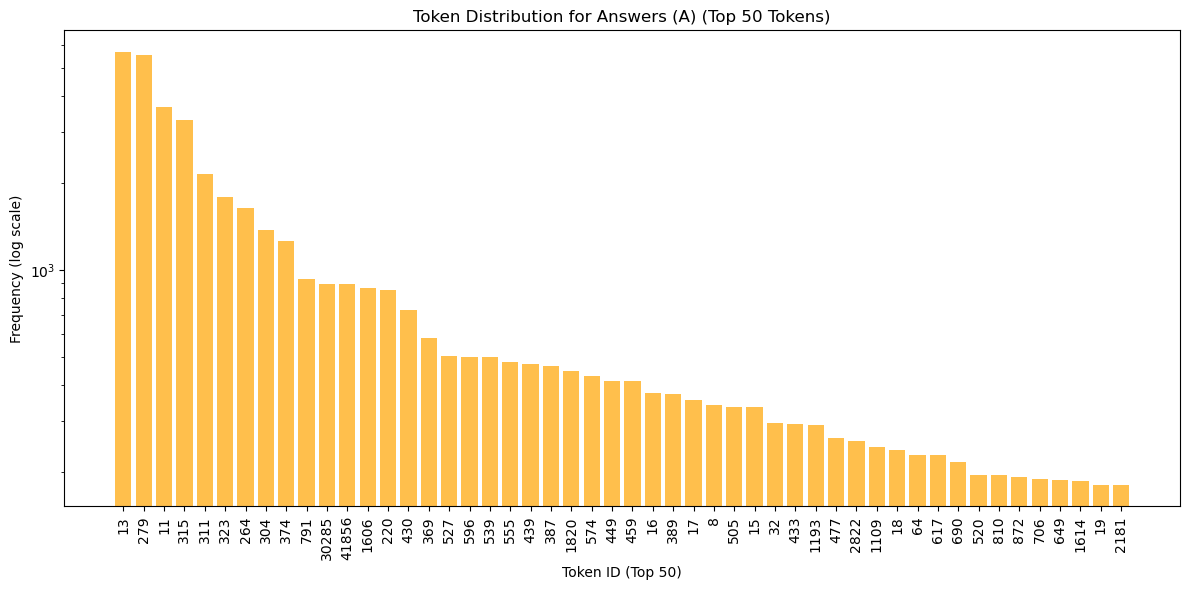

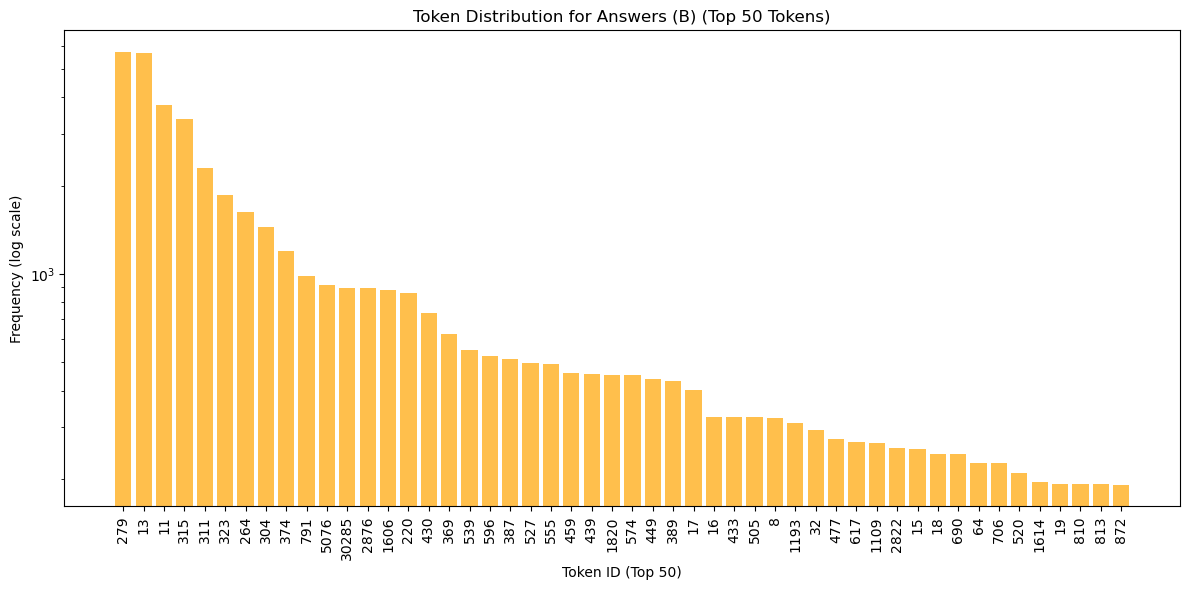

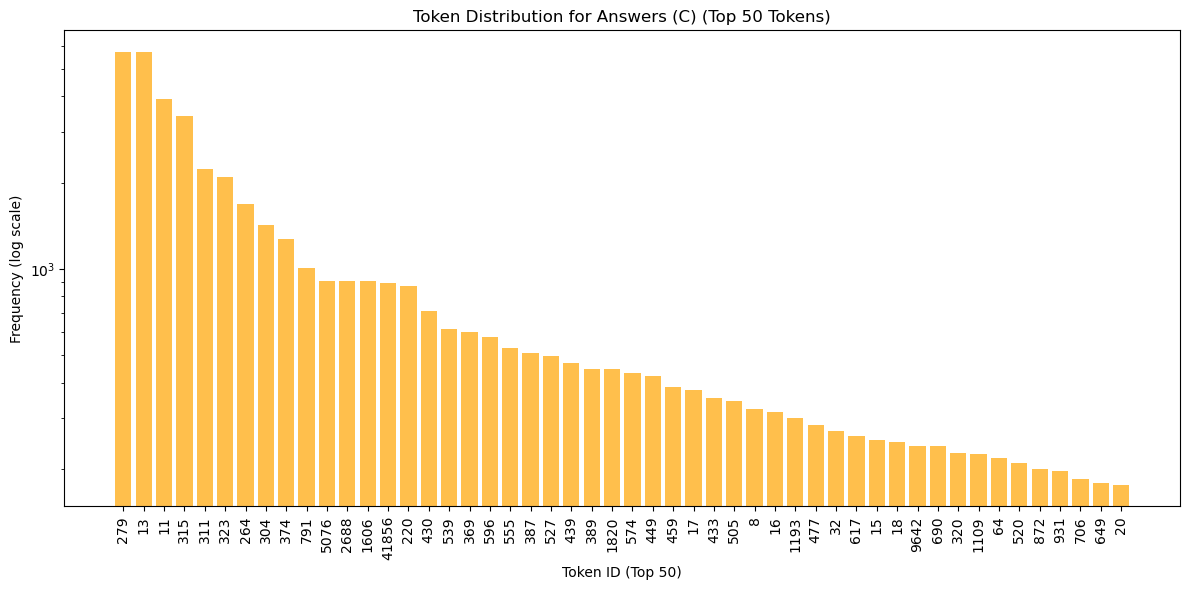

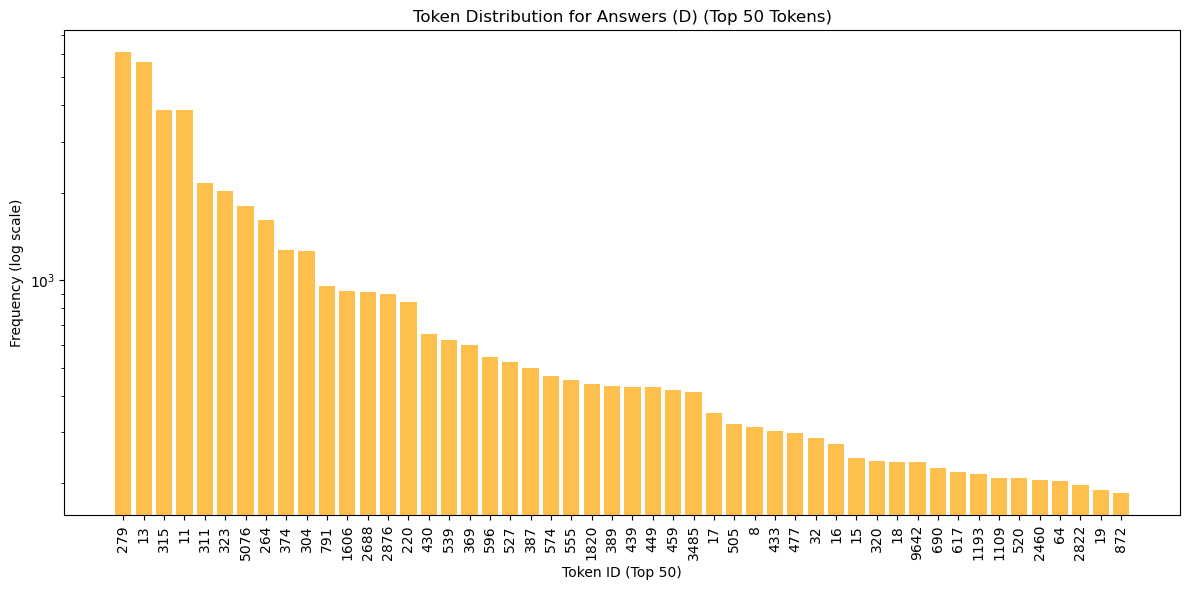

In [40]:
# Load the MMLU test data
df_test = pd.read_csv('data/task_1/mmlu_data/test.csv')

# Define the tokenization function
def tokenize_text(s):
    try:
        import tiktoken
    except ImportError:
        print("Please install the `tiktoken` package.")
        return []

    enc = tiktoken.encoding_for_model('gpt-4')
    return enc.encode(str(s))

# Tokenize the answers in each column (A, B, C, D)
for column in ["A", "B", "C", "D"]:
    df_test[f"{column}_tokens"] = df_test[column].apply(tokenize_text)

# Plot token distributions for each column
for column in ["A", "B", "C", "D"]:
    # Flatten tokens for the current column
    column_tokens = [token for tokens in df_test[f"{column}_tokens"] for token in tokens]

    # Count token frequencies
    token_counts = Counter(column_tokens)

    # Sort tokens by frequency
    sorted_tokens = sorted(token_counts.items(), key=lambda x: x[1], reverse=True)

    # Extract the top 50 tokens
    top_tokens = sorted_tokens[:50]
    tokens, counts = zip(*top_tokens)

    # Plot the token distribution (log scale)
    plt.figure(figsize=(12, 6))
    plt.bar(range(len(tokens)), counts, color='orange', alpha=0.7)
    plt.yscale('log')
    plt.xticks(range(len(tokens)), tokens, rotation=90)
    plt.xlabel('Token ID (Top 50)')
    plt.ylabel('Frequency (log scale)')
    plt.title(f'Token Distribution for Answers ({column}) (Top 50 Tokens)')
    plt.tight_layout()
    plt.show()


In [41]:
# Define the tokenization function
def get_tokenizer():
    try:
        import tiktoken
    except ImportError:
        print("Please install the `tiktoken` package.")
        return None

    return tiktoken.get_encoding('cl100k_base')  # Adjusted to retrieve the actual tokenizer

# Initialize the tokenizer
tokenizer = get_tokenizer()

def tokenize_text(s):
    if tokenizer is None:
        return []
    return tokenizer.encode(str(s))

# Tokenize the answers in each column (A, B, C, D)
for column in ["A", "B", "C", "D"]:
    df_test[f"{column}_tokens"] = df_test[column].apply(tokenize_text)

# Analyze the top 50 tokens for each column and calculate the overlap
top_tokens_by_column = {}
for column in ["A", "B", "C", "D"]:
    # Flatten tokens for the current column
    column_tokens = [token for tokens in df_test[f"{column}_tokens"] for token in tokens]

    # Count token frequencies
    token_counts = Counter(column_tokens)

    # Sort tokens by frequency and extract the top 50
    sorted_tokens = sorted(token_counts.items(), key=lambda x: x[1], reverse=True)
    top_tokens_by_column[column] = {token for token, _ in sorted_tokens[:50]}

# Compute the intersection of top tokens across all columns
overlapping_tokens = set.intersection(
    *[top_tokens_by_column[column] for column in ["A", "B", "C", "D"]]
)

# Map overlapping tokens back to their corresponding words
overlapping_tokens_with_words = {
    token: tokenizer.decode([token]) for token in overlapping_tokens
}

# Print the total number of overlapping tokens
print(f"Total Number of Overlapping Tokens: {len(overlapping_tokens)}")

# Print the overlapping tokens with their corresponding words
print("\nOverlapping Tokens (Top 50) Across All Columns:")
for token, word in overlapping_tokens_with_words.items():
    print(f"Token: {token}, Word: {word}")


Total Number of Overlapping Tokens: 41

Overlapping Tokens (Top 50) Across All Columns:
Token: 387, Word:  be
Token: 389, Word:  on
Token: 264, Word:  a
Token: 8, Word: )
Token: 520, Word:  at
Token: 11, Word: ,
Token: 13, Word: .
Token: 527, Word:  are
Token: 16, Word: 1
Token: 17, Word: 2
Token: 15, Word: 0
Token: 18, Word: 3
Token: 791, Word: The
Token: 279, Word:  the
Token: 539, Word:  not
Token: 1820, Word: the
Token: 32, Word: A
Token: 1193, Word:  only
Token: 555, Word:  by
Token: 430, Word:  that
Token: 304, Word:  in
Token: 433, Word:  it
Token: 690, Word:  will
Token: 311, Word:  to
Token: 439, Word:  as
Token: 315, Word:  of
Token: 574, Word:  was
Token: 64, Word: a
Token: 449, Word:  with
Token: 323, Word:  and
Token: 1606, Word:  because
Token: 459, Word:  an
Token: 596, Word: 's
Token: 1109, Word:  than
Token: 220, Word:  
Token: 477, Word:  or
Token: 872, Word:  their
Token: 617, Word:  have
Token: 369, Word:  for
Token: 374, Word:  is
Token: 505, Word:  from


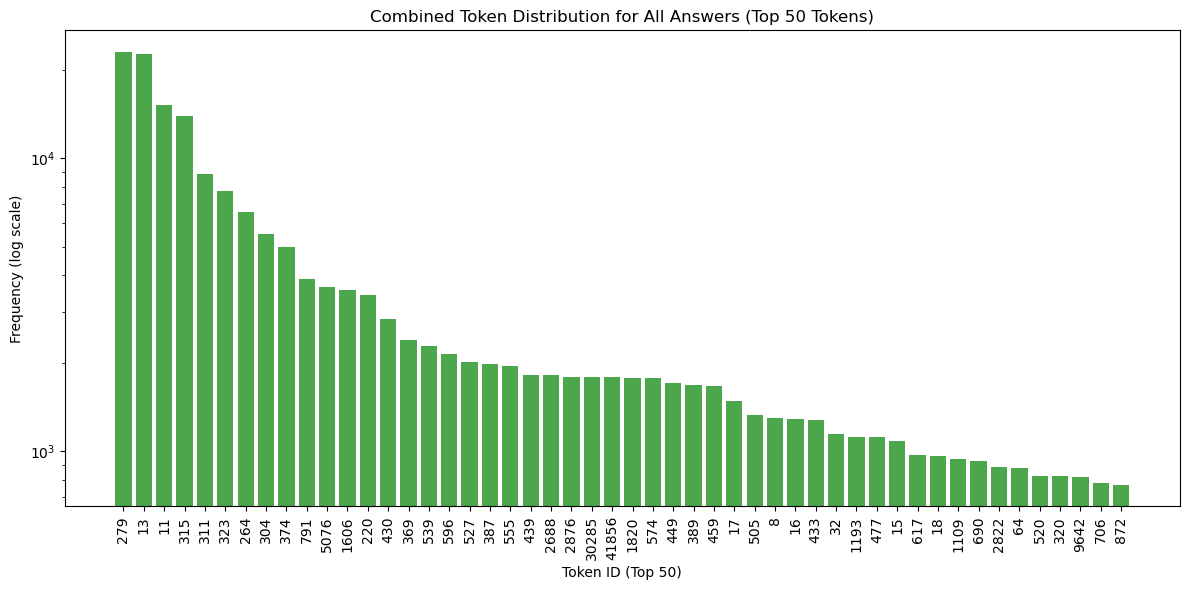

In [42]:
# Combine tokens from all answer columns
all_answer_tokens = []
for column in ["A_tokens", "B_tokens", "C_tokens", "D_tokens"]:
    all_answer_tokens.extend([token for tokens in df_test[column] for token in tokens])

# Count token frequencies for all answers
combined_token_counts = Counter(all_answer_tokens)

# Sort tokens by frequency
sorted_combined_tokens = sorted(combined_token_counts.items(), key=lambda x: x[1], reverse=True)

# Extract the top 50 tokens
top_combined_tokens = sorted_combined_tokens[:50]
tokens, counts = zip(*top_combined_tokens)

# Plot the token distribution (log scale)
plt.figure(figsize=(12, 6))
plt.bar(range(len(tokens)), counts, color='green', alpha=0.7)
plt.yscale('log')
plt.xticks(range(len(tokens)), tokens, rotation=90)
plt.xlabel('Token ID (Top 50)')
plt.ylabel('Frequency (log scale)')
plt.title('Combined Token Distribution for All Answers (Top 50 Tokens)')
plt.tight_layout()
plt.show()


In [43]:
# C
def tokenize_text(s):
    if tokenizer is None:
        return []
    return tokenizer.encode(str(s))

# Tokenize the questions
df_test['question_tokens'] = df_test['question'].apply(tokenize_text)

# Tokenize the answers (A, B, C, D)
for column in ["A", "B", "C", "D"]:
    df_test[f"{column}_tokens"] = df_test[column].apply(tokenize_text)

# Define the token IDs for "A", "B", "C", and "D"
token_ids = {letter: tokenizer.encode(letter)[0] for letter in ["A", "B", "C", "D"]}

# Initialize counters for "A", "B", "C", and "D" in questions and answers
question_token_counts = {letter: 0 for letter in ["A", "B", "C", "D"]}
answer_token_counts = {letter: 0 for letter in ["A", "B", "C", "D"]}

# Count occurrences of "A", "B", "C", and "D" tokens in questions
for tokens in df_test['question_tokens']:
    for letter, token_id in token_ids.items():
        question_token_counts[letter] += tokens.count(token_id)

# Count occurrences of "A", "B", "C", and "D" tokens in answers
for column in ["A", "B", "C", "D"]:
    for tokens in df_test[f"{column}_tokens"]:
        for letter, token_id in token_ids.items():
            answer_token_counts[letter] += tokens.count(token_id)

# Compute the relative distribution (normalized to sum to 1)
total_question_specific_tokens = sum(question_token_counts.values())
total_answer_specific_tokens = sum(answer_token_counts.values())

question_relative_distribution = {
    letter: count / total_question_specific_tokens for letter, count in question_token_counts.items()
}
answer_relative_distribution = {
    letter: count / total_answer_specific_tokens for letter, count in answer_token_counts.items()
}

# Print the relative distributions
print("Relative Distribution of Tokens (A, B, C, D) in Questions:")
for letter, rel_freq in question_relative_distribution.items():
    print(f"{letter}: {rel_freq:.4f}")

print("\nRelative Distribution of Tokens (A, B, C, D) in Answers:")
for letter, rel_freq in answer_relative_distribution.items():
    print(f"{letter}: {rel_freq:.4f}")


Relative Distribution of Tokens (A, B, C, D) in Questions:
A: 0.8918
B: 0.0357
C: 0.0457
D: 0.0269

Relative Distribution of Tokens (A, B, C, D) in Answers:
A: 0.5687
B: 0.1291
C: 0.1998
D: 0.1024


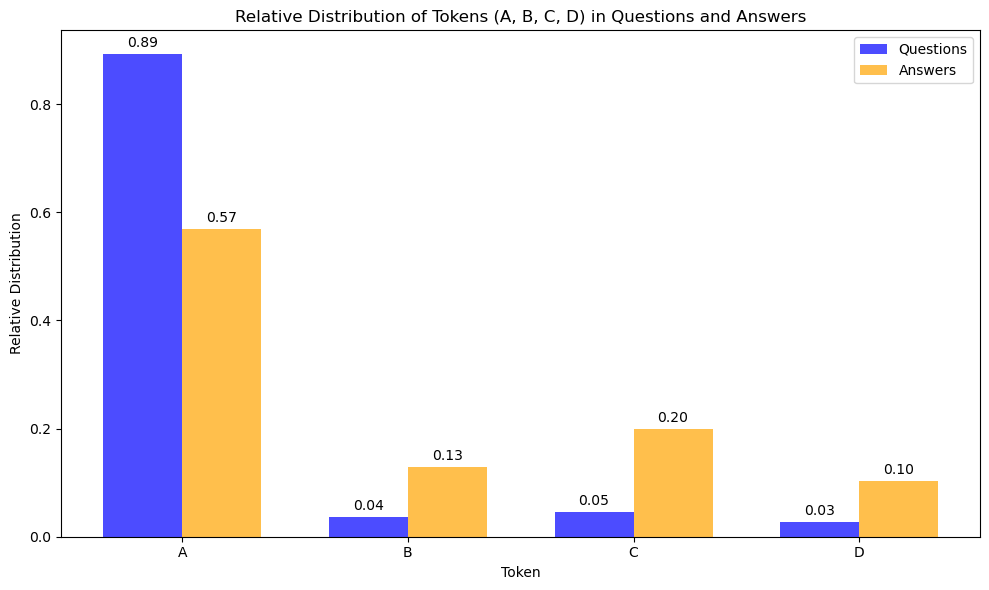

In [44]:
# Prepare data for visualization
categories = ["A", "B", "C", "D"]
question_values = [question_relative_distribution[cat] for cat in categories]
answer_values = [answer_relative_distribution[cat] for cat in categories]

x = np.arange(len(categories))  # the label locations
width = 0.35  # the width of the bars

# Create a grouped bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, question_values, width, label='Questions', color='blue', alpha=0.7)
bars2 = ax.bar(x + width/2, answer_values, width, label='Answers', color='orange', alpha=0.7)

# Add labels, title, and legend
ax.set_xlabel('Token')
ax.set_ylabel('Relative Distribution')
ax.set_title('Relative Distribution of Tokens (A, B, C, D) in Questions and Answers')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

# Add values on top of bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # offset text by 3 points
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()


### 3.2 (3 pt)

What if the number of "A", "B", "C", and "D" tokens in the question and answer pairs could influence a language model's decisions?

A. For each question-answer pair, compute: 
1. the number of "A", "B", "C", and "D" tokens that occur in the combined question and answers; 
2. an the total number of tokens.
3. then, group by the "correct" answer and compute the mean frequency of A, B, C, and D tokens and the total number of tokens. 
4. finally, print your results

B. /Discuss:/ What do you think of the hypothesis that the frequency of A, B, C, and D tokens could influence answers?


In [45]:
#A
from collections import Counter

# Compute the number of "A", "B", "C", and "D" tokens and total tokens for each question-answer pair
token_counts_per_pair = []

# Define the token IDs for "A", "B", "C", "D"
token_ids = {letter: tokenizer.encode(letter)[0] for letter in ["A", "B", "C", "D"]}

for index, row in df_test.iterrows():
    # Combine tokens from the question and all answer options
    combined_tokens = row['question_tokens']
    for column in ["A", "B", "C", "D"]:
        combined_tokens += row[f"{column}_tokens"]

    # Count the occurrences of "A", "B", "C", and "D" tokens
    token_counts = {letter: combined_tokens.count(token_id) for letter, token_id in token_ids.items()}

    # Compute the total number of tokens
    total_tokens = len(combined_tokens)

    # Append data for grouping
    token_counts_per_pair.append({
        "correct": row["answer"],  # Correct answer for grouping
        "A_count": token_counts["A"],
        "B_count": token_counts["B"],
        "C_count": token_counts["C"],
        "D_count": token_counts["D"],
        "total_tokens": total_tokens
    })

# Convert results into a DataFrame
token_counts_df = pd.DataFrame(token_counts_per_pair)

# Group by "correct" answer and compute mean frequency of A, B, C, D tokens and total tokens
grouped_means = token_counts_df.groupby("correct").mean()

# Print the results
print("Mean Frequency of Tokens (A, B, C, D) and Total Tokens Grouped by Correct Answer:")
print(grouped_means)


Mean Frequency of Tokens (A, B, C, D) and Total Tokens Grouped by Correct Answer:
          A_count   B_count   C_count   D_count  total_tokens
correct                                                      
A        0.248293  0.029485  0.031657  0.019243     93.865922
B        0.235413  0.025708  0.037262  0.021664     89.461005
C        0.228922  0.022334  0.040201  0.016192     93.302624
D        0.248941  0.022775  0.037871  0.020922     92.756621


B. /Discuss:/ We see that the total number of tokens regarding which Letter was the correct answer was comparable.
However, something is quite shocking, namely the fact that the count of A was much higher than any other token, regardless of which was the correct answer. This could perhaps explain the Model X bias towards picking A. For the rest, there does not seem to have any relation between the count and the correct answer.

### 3.3 (4 pt)

Three of the most important considerations when deciding between language models are:

Quality
Costs
Speed

So far, much of your analysis has focused on quality. However, the government has indicated that they are quite concerned about both the total costs and speed as well. Specifically, it has been brought to their attention that a new `turbo` model has been launched! 

This model is both cheaper and faster than the models you evaluated so far. However, there is a catch: the context length* is much smaller than that of the other LMS. Namely, it can only process **300** tokens during inference. Meanwhile, the other models can process up to 100K tokens! 

*_The “context length” refers to the number of tokens that can be given to an LM as input._

A. Are there subjects where using the cheaper model might be problematic? I.e., where part of the question and answer(s) might not fit completely in the context?

B. /Discuss:/ Can you think of a strategy that would balance the needs of the government?

**hint**:
- An LM needs to have both the question and the different answer options in its context

In [46]:
#A
# Calculate the combined token count (question + A, B, C, D) for each row
df_test["total_combined_tokens"] = df_test["question_tokens"].apply(len) + \
                                   df_test["A_tokens"].apply(len) + \
                                   df_test["B_tokens"].apply(len) + \
                                   df_test["C_tokens"].apply(len) + \
                                   df_test["D_tokens"].apply(len)

# Filter rows where the total combined token count exceeds 300
problematic_rows = df_test[df_test["total_combined_tokens"] > 300]

# Group by subject and count the number of problematic rows per subject
problematic_subjects = problematic_rows["subject"].value_counts()

# Print the results
print("Subjects with problematic questions (total combined tokens > 300):")
print(problematic_subjects)

# Calculate the percentage of problematic questions for each subject
total_questions_per_subject = df_test["subject"].value_counts()
percentage_problematic = (problematic_subjects / total_questions_per_subject * 100).sort_values(ascending=False)

print("\nPercentage of problematic questions by subject:")
print(percentage_problematic)


Subjects with problematic questions (total combined tokens > 300):
subject
professional law                774
high school world history       159
high school us history          136
high school european history    106
security studies                 95
professional medicine            22
high school statistics            8
high school psychology            5
college medicine                  5
formal logic                      5
machine learning                  3
high school computer science      3
high school physics               3
professional psychology           2
philosophy                        2
miscellaneous                     2
astronomy                         2
college biology                   2
computer security                 2
high school chemistry             1
high school biology               1
college computer science          1
college chemistry                 1
virology                          1
Name: count, dtype: int64

Percentage of problematic question

In [47]:
# Compute the total token length (question + answers) for each row
df_test['total_tokens'] = df_test['question_tokens'].apply(len)
for column in ["A", "B", "C", "D"]:
    df_test['total_tokens'] += df_test[f"{column}_tokens"].apply(len)

# Compute the average token length per subject
average_tokens_per_subject = df_test.groupby('subject')['total_tokens'].mean().sort_values(ascending=False)

# Display the average token length per subject
print("Average Token Length of Context (Question + Answers) Per Subject:")
print(average_tokens_per_subject)


Average Token Length of Context (Question + Answers) Per Subject:
subject
high school european history           373.539394
high school world history              370.607595
high school us history                 331.764706
professional law                       313.009126
security studies                       269.244898
professional medicine                  196.345588
high school statistics                 152.111111
international law                      137.553719
formal logic                           136.365079
high school computer science           134.180000
college medicine                       125.208092
econometrics                           122.552632
high school physics                    120.264901
professional accounting                119.822695
college computer science               117.660000
moral scenarios                        105.414525
high school chemistry                  101.605911
high school biology                    101.464516
astronomy                 

B. /Discuss:/ We see that there are subjects where the Context Length of the Turbo model might be problematic, since the total number of tokens exceeds 300. This is especially problematic for High School World History, where 67% of the Context Length exceeds the limit, also for Hich School US History, High School European History, Professional Law, and Security Studies. This makes sense, since these subjscts tend to be more Verbose and require longer texts and descriptions.

One possible work around for the government would be to use the Turbo Model for the subjects that are known for having much smaller context lengths and use the more expensive models for the subjects that are known for having longer context lengths. This way, the government could save money while also ensuring that the quality of the answers is not compromised. And, in the case where there might be a question from a subject that is not usually verbose, they could redirect it to the more expensive model.

### 3.4 (4 pt)

/Discuss:/ The time has come to give your final recommendation on the use of LMs in education to the government! Taking into account everything you analyzed in all the preceding tasks (1, 2, and 3), please write a short recommendation consisting of 4 bullet points discussing your concerns.

B. /Discuss:/

1.

2.

3.

4.